In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_path = "c:/windows/Fonts/malgun.ttf" #한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

데이터 정의

In [3]:
path_1 = "C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Training/*.csv"
path_2 = "C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Validation/*.csv"
file_list = glob.glob(path_1)
file_list.extend(glob.glob(path_2))

print ("file_list_csv: {}".format(file_list))

file_list_csv: ['C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Training\\1.옥외누수(out-training).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Training\\2.옥내누수(in-training).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Training\\3.기계.전기음(noise-training).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Training\\4.환경음(other-training).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Training\\5.정상음(normal-training).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Validation\\1.옥외누수(out-validation).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Validation\\2.옥내누수(in-validation).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Validation\\3.기계.전기음(noise-validation).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수 감지)/Validation\\4.환경음(other-validation).csv', 'C:/Users/bro11/Desktop/4-2/AI-Deep/팀프로젝트/상하수도 데이터(상수관로 누수

In [4]:
alldata = []

for file in file_list:
    df = pd.read_csv(file)
    alldata.append(df)

df = pd.concat(alldata, ignore_index=True)


In [5]:
print('데이터 수집 시작일:',df['ldate'].min())
print('데이터 수집 종료일:',df['ldate'].max())

데이터 수집 시작일: 20190227
데이터 수집 종료일: 20210210


탐색적 데이터 분석 (EDA : Exploratory Data Analysis)

In [6]:
df.shape

(70384, 539)

In [7]:
df.columns

Index(['site', 'sid', 'ldate', 'lrate', 'llevel', 'leaktype', '0HZ', '10HZ',
       '20HZ', '30HZ',
       ...
       'MAX10', 'MAX11', 'MAX12', 'MAX13', 'MAX14', 'MAX15', 'MAX16', 'MAX17',
       'MAX18', 'MAX19'],
      dtype='object', length=539)

In [8]:
#결측값 확인
df.isna().sum().describe()

#확인결과 결측값 없음

count    539.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [9]:
#중복된 열 확인

df[df.duplicated(keep=False)]

#확인결과 중복된 열 업음

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19


In [10]:
#결함 종류별
df.loc[df['leaktype']=='normal']

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
42860,S-2911010107,S-0359369084047865,20201218,70,160,normal,0,4,4,4,...,280,133,270,115,280,190,280,178,280,146
42861,S-4571025029,S-0359369084037239,20200818,70,241,normal,0,3,4,5,...,310,152,330,250,300,243,320,83,320,392
42862,S-4571025029,S-0359369084036124,20200501,70,527,normal,0,3,4,4,...,270,418,270,85,120,33,270,29,300,759
42863,S-2711010100,S-0359369084033055,20201029,50,215,normal,0,4,4,4,...,300,67,300,109,300,67,300,92,300,70
42864,S-2711010100,S-0359369084044920,20201130,70,157,normal,0,4,4,4,...,190,141,190,115,200,141,290,134,200,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70379,S-2911010107,S-0359369084034657,20200813,30,433,normal,0,3,4,4,...,260,68,260,87,260,111,260,152,270,90
70380,S-4413110100,S-0359369081312338,20200613,60,249,normal,0,4,4,4,...,420,179,440,243,440,44,440,327,440,248
70381,S-4571025029,S-0359369084020284,20200730,40,309,normal,0,4,4,4,...,250,46,250,31,250,561,250,146,250,218
70382,S-4571025029,S-0359369084042338,20200729,40,381,normal,0,4,4,4,...,300,35,300,154,300,426,300,544,300,336


In [11]:
#지점의 수
df['site'].value_counts()

site
S-4571025029    11071
S-4677025028     7216
S-4677025033     5070
S-2711010100     4908
S-4372025021     4798
S-4784025026     4218
S-2911010107     3877
S-4793025022     3256
S-4772025022     2678
S-4673025027     2585
S-4885025022     2343
S-4677025029     2241
S-4521010100     2218
S-4413110100     1682
S-4721011100     1574
S-4573025028     1542
S-4729010102     1506
S-5011010101     1269
S-4682025024      835
S-4886025023      795
S-4687025030      758
S-4728010101      574
S-4684025022      487
S-3611010100      476
S-4180025322      470
S-4280025040      336
S-2911010106      231
S-2911010103      217
S-4376025033      188
S-4279025022      149
S-4580025036       94
S-4380032023       88
S-4615010101       82
S-2911010105       82
S-4580025039       81
S-2911010109       77
S-4725010101       76
S-4713010102       60
S-4572025030       42
S-4283025025       33
S-4691025031       26
S-4782025027       24
S-4729010101       23
S-4687025032       19
S-4672025033        3
S-428

In [12]:
df.loc[df['site']=='S-4571025029']['leaktype'].unique()

array(['out', 'noise', 'other', 'normal'], dtype=object)

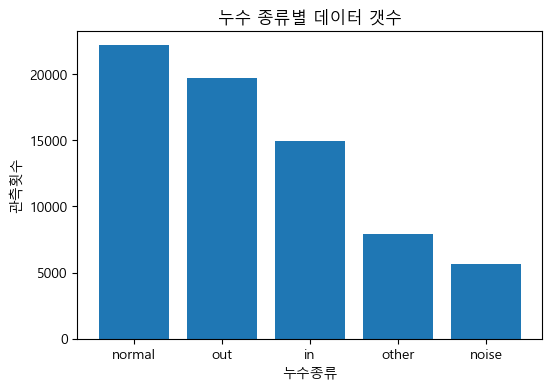

In [13]:
count = df['leaktype'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(count.index, count.values)
plt.xlabel('누수종류')
plt.ylabel('관측횟수')
plt.title('누수 종류별 데이터 갯수')
plt.show()


In [14]:
col_list=['normal','other','noise','out','in']
means=[]
for col in col_list:
    col_mean=df.loc[df['leaktype']==col].iloc[:,6:-20].mean()
    means.append(col_mean)
    
col_mean=pd.concat(means,axis=1)
col_mean.columns=col_list
col_mean

,normal,other,noise,out,in
0HZ,0.000000,0.000000,0.000000,0.000000,0.000000
10HZ,4.260895,5.360137,4.465005,5.731336,6.553710
20HZ,4.433276,5.762062,5.027925,6.026963,6.792392
30HZ,4.629207,6.293656,5.622835,6.388374,7.223480
40HZ,4.711450,6.352919,6.249028,6.870711,8.080230
...,...,...,...,...,...
5080HZ,6.343589,7.652146,4.686108,6.771071,8.748527
5090HZ,6.334251,7.644802,4.585366,6.741676,8.787102
5100HZ,6.322160,7.598202,4.550548,6.735340,8.811546
5110HZ,6.318100,7.601747,4.522800,6.701789,8.792861


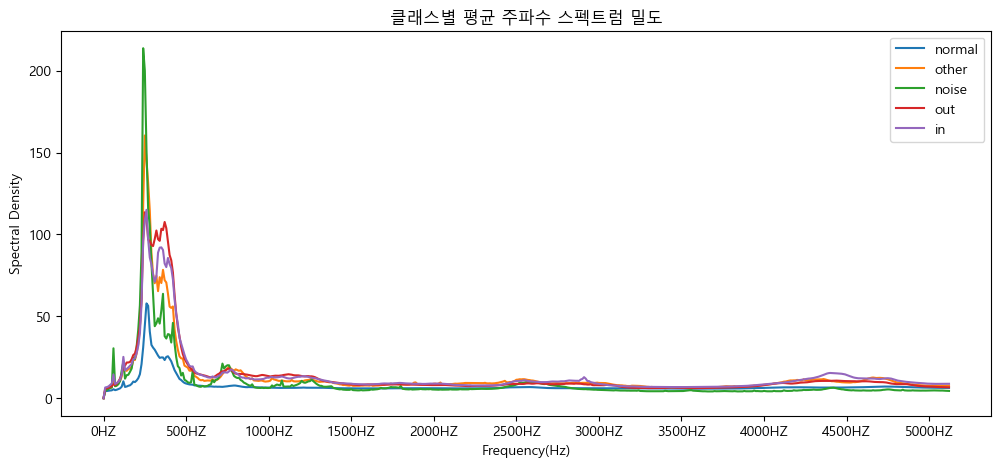

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(col_mean,label=col_list)
plt.xticks(np.arange(0, len(col_mean), 50), labels=col_mean.index[::50])
plt.title('클래스별 평균 주파수 스펙트럼 밀도')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Spectral Density')
plt.legend()
plt.show()


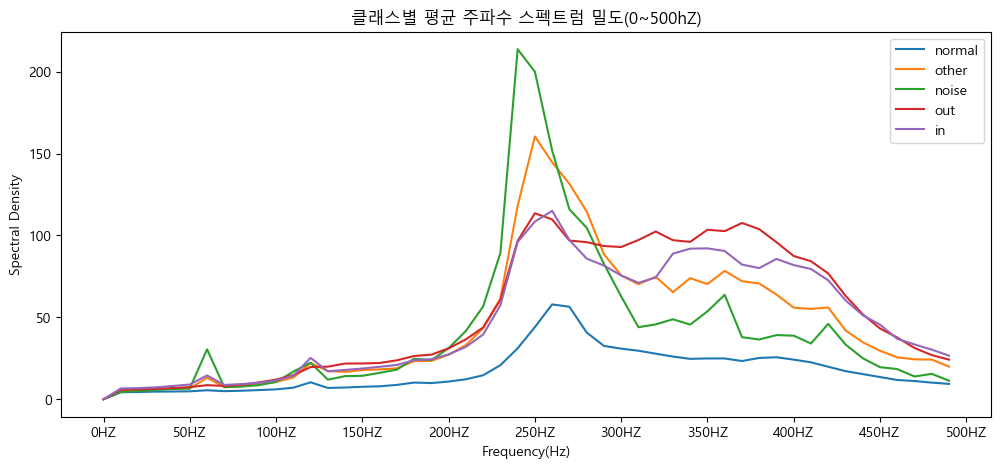

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(col_mean[:50],label=col_list)
plt.xticks(np.arange(0, len(col_mean[:55]), 5), labels=col_mean[:55].index[::5])
plt.title('클래스별 평균 주파수 스펙트럼 밀도(0~500hZ)')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Spectral Density')
plt.legend()
plt.show()

In [17]:
col_list=['normal','other','noise','out','in']
means_max=[]
for col in col_list:
    col_mean_max=df.loc[df['leaktype']==col].iloc[:,-20:].mean()
    means_max.append(col_mean_max)
    
col_mean_max=pd.concat(means_max,axis=1)
col_mean_max.columns=col_list
col_mean_max

,normal,other,noise,out,in
MAX0,435.297753,565.500823,351.657830,563.598398,579.971203
MAX1,169.463638,520.713689,583.893248,530.201865,506.516877
MAX2,431.733736,563.370900,350.505479,566.978866,578.998125
MAX3,172.670757,523.715335,585.761930,531.045614,505.306389
MAX4,419.668862,565.041155,354.727819,564.189854,579.083847
MAX5,169.166697,522.047233,583.340756,530.138817,505.354206
MAX6,424.687810,550.395087,353.144221,565.771628,575.778864
MAX7,166.234954,524.495885,589.509897,530.625564,507.547013
MAX8,426.154922,558.376599,350.558501,568.278851,579.515805
MAX9,168.813859,524.400912,590.409332,529.344230,507.648205


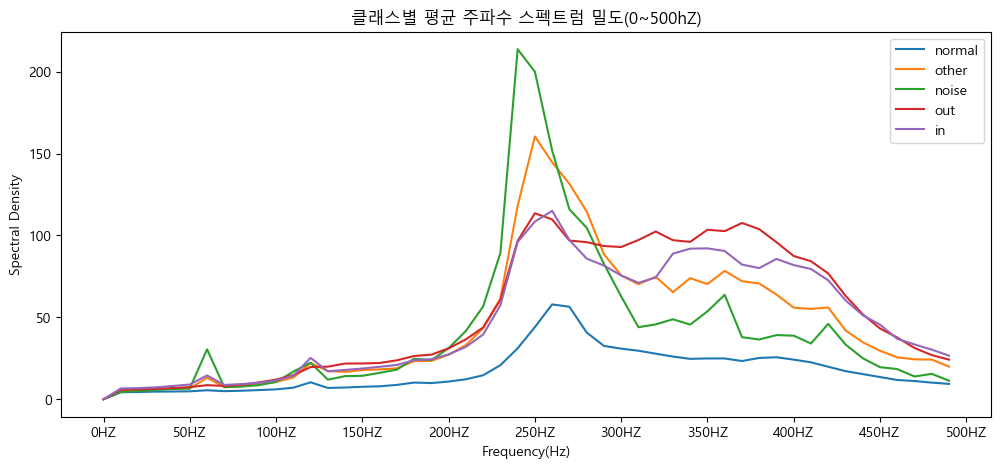

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(col_mean[:50],label=col_list)
plt.xticks(np.arange(0, len(col_mean[:55]), 5), labels=col_mean[:55].index[::5])
plt.title('클래스별 평균 주파수 스펙트럼 밀도(0~500hZ)')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Spectral Density')
plt.legend()
plt.show()

In [19]:
col_list=['normal','other','noise','out','in']
means_max=[]
for col in col_list:
    col_mean_max=df.loc[df['leaktype']==col].iloc[:,-20:].mean()
    means_max.append(col_mean_max)
    
col_mean_max=pd.concat(means_max,axis=1)
col_mean_max.columns=col_list
col_mean_max

,normal,other,noise,out,in
MAX0,435.297753,565.500823,351.657830,563.598398,579.971203
MAX1,169.463638,520.713689,583.893248,530.201865,506.516877
MAX2,431.733736,563.370900,350.505479,566.978866,578.998125
MAX3,172.670757,523.715335,585.761930,531.045614,505.306389
MAX4,419.668862,565.041155,354.727819,564.189854,579.083847
MAX5,169.166697,522.047233,583.340756,530.138817,505.354206
MAX6,424.687810,550.395087,353.144221,565.771628,575.778864
MAX7,166.234954,524.495885,589.509897,530.625564,507.547013
MAX8,426.154922,558.376599,350.558501,568.278851,579.515805
MAX9,168.813859,524.400912,590.409332,529.344230,507.648205


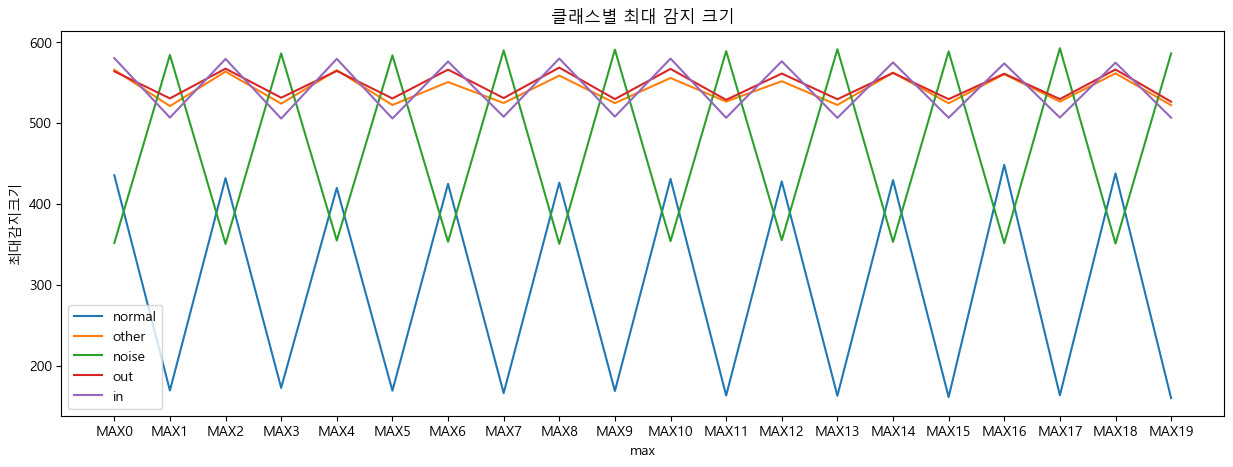

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(col_mean_max,label=col_list)
plt.xticks(np.arange(0, len(col_mean_max)), labels=col_mean_max.index)
plt.title('클래스별 최대 감지 크기')
plt.xlabel('max')
plt.ylabel('최대감지크기')
plt.legend()
plt.show()


In [37]:
for i in range(1, 20):
    current_max_col = f"MAX{i}"
    previous_max_col = f"MAX{i - 1}"
    
    # 파생 변수 생성
    df[f"{current_max_col}_diff"] = df[current_max_col] - df[previous_max_col]

# 결과 확인
print(df.head())

           site                 sid     ldate  lrate  llevel leaktype  0HZ  \
0  S-4687025030  S-0359369085120315  20200708     90     256      out    0   
1  S-4677025028  S-0359369083968368  20190601     90     542      out    0   
2  S-4673025027  S-0359369085133797  20201028     90     705      out    0   
3  S-4772025022  S-0359369084117593  20200505     90     499      out    0   
4  S-4729010102  S-0359369084010178  20200520     90     423      out    0   

   10HZ  20HZ  30HZ  ...  MAX10_diff  MAX11_diff  MAX12_diff  MAX13_diff  \
0    18    19    16  ...        4462       -4447        4467       -4426   
1     4     2     4  ...        -337         113        -123         411   
2     0     0     3  ...        -495         511        -511         657   
3     2     2     2  ...        -223         179        -189          67   
4     3     3     3  ...         118         121        -121          -5   

   MAX14_diff  MAX15_diff  MAX16_diff  MAX17_diff  MAX18_diff  MAX19_diff 

In [21]:
df.columns

Index(['site', 'sid', 'ldate', 'lrate', 'llevel', 'leaktype', '0HZ', '10HZ',
       '20HZ', '30HZ',
       ...
       'MAX10', 'MAX11', 'MAX12', 'MAX13', 'MAX14', 'MAX15', 'MAX16', 'MAX17',
       'MAX18', 'MAX19'],
      dtype='object', length=539)

In [22]:
col

'in'

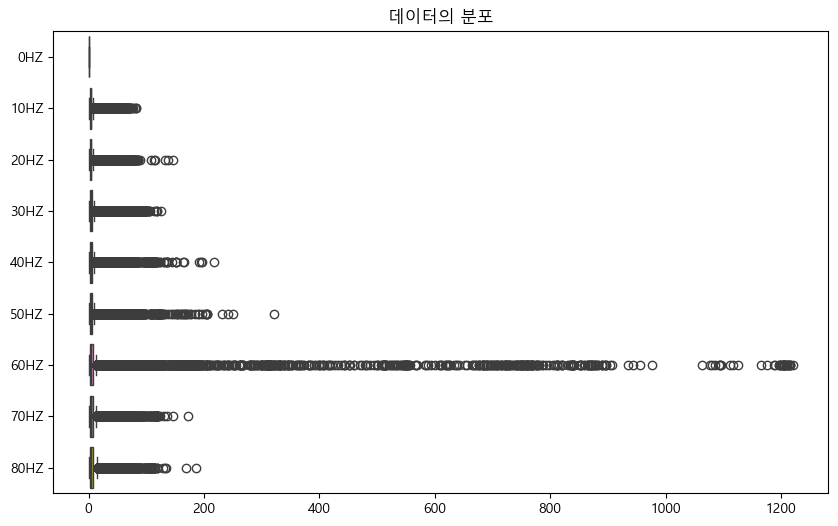

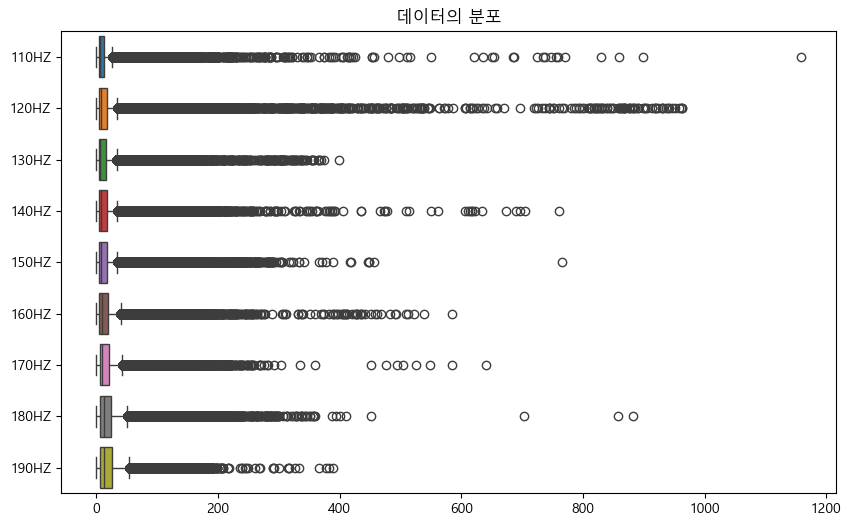

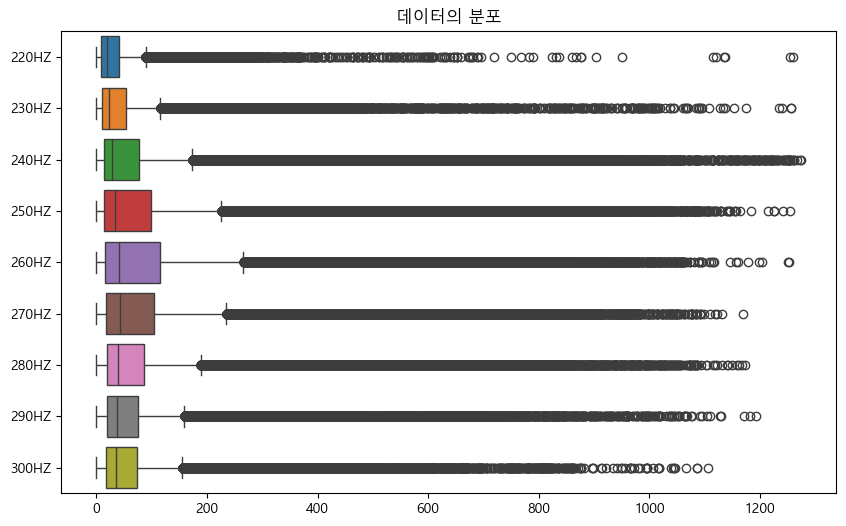

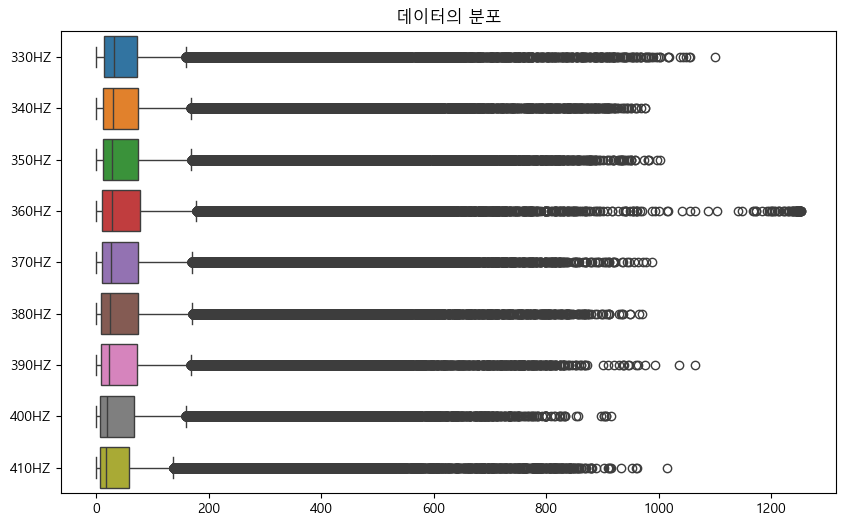

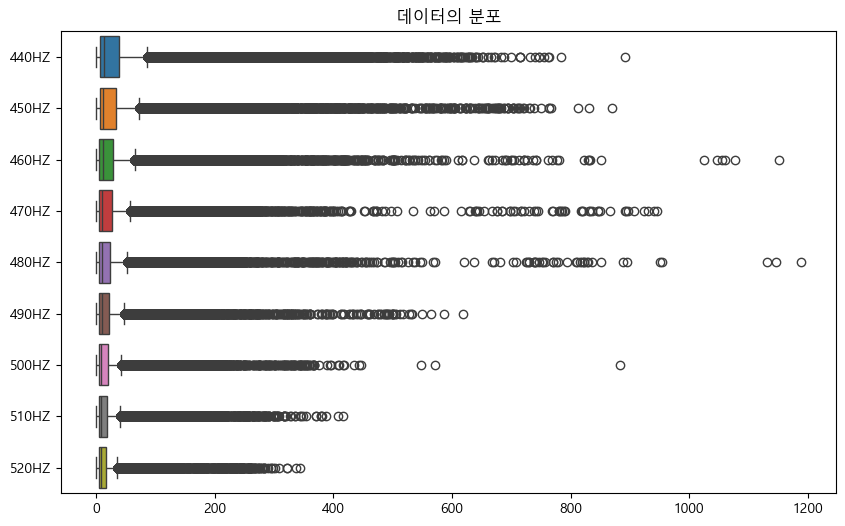

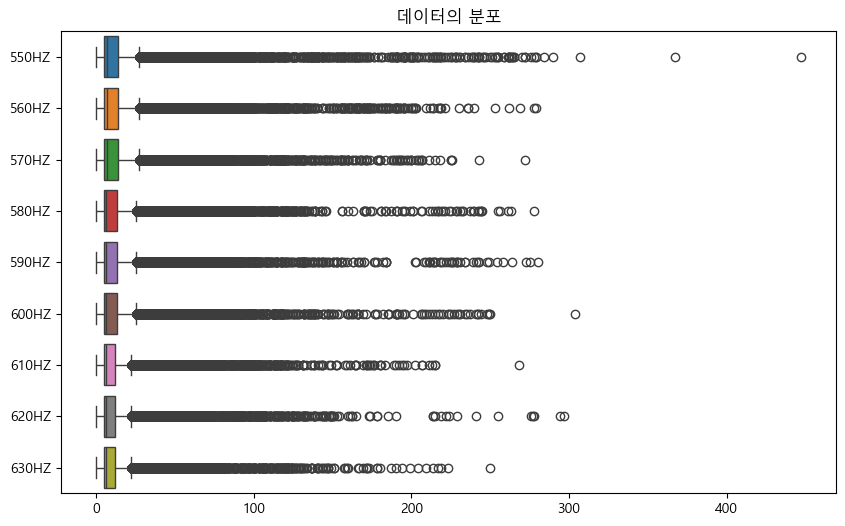

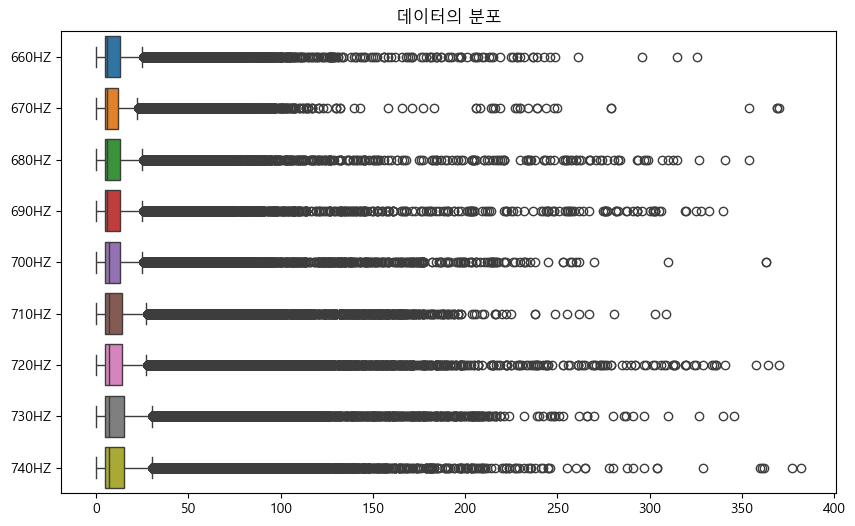

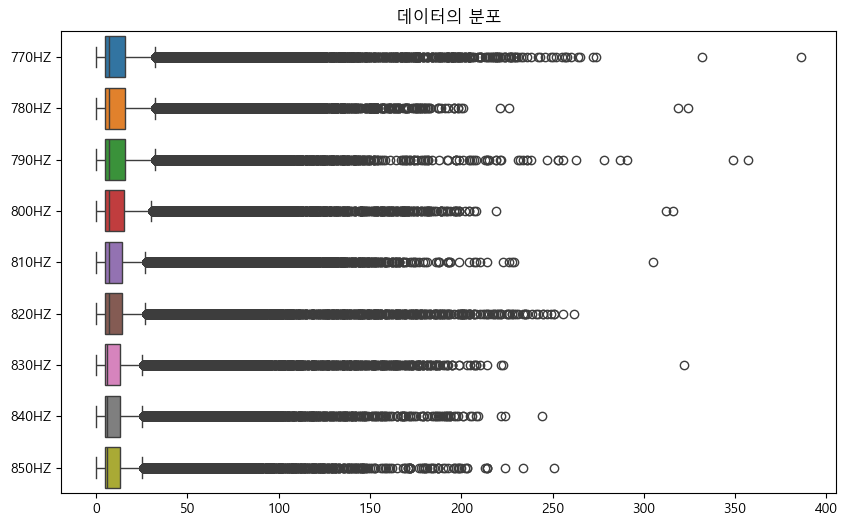

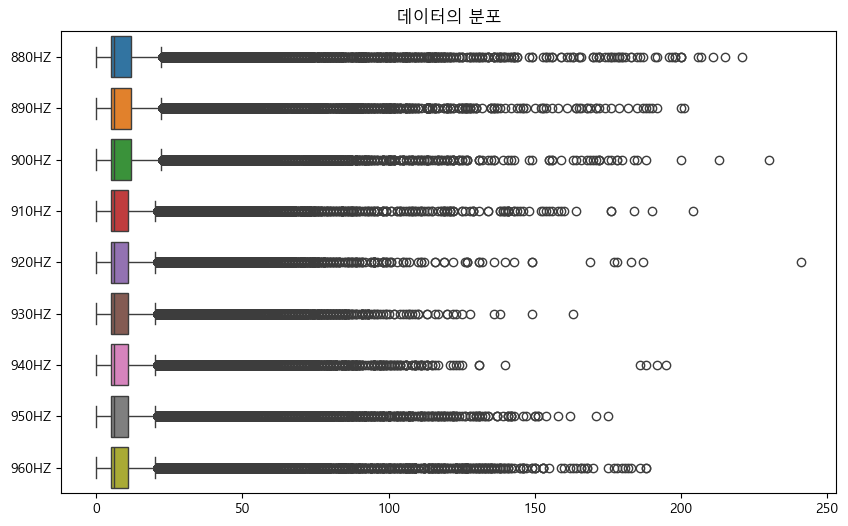

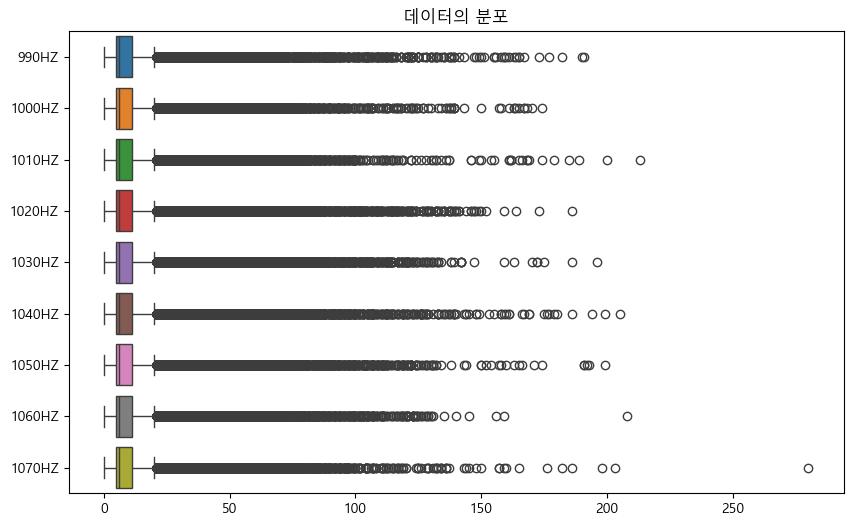

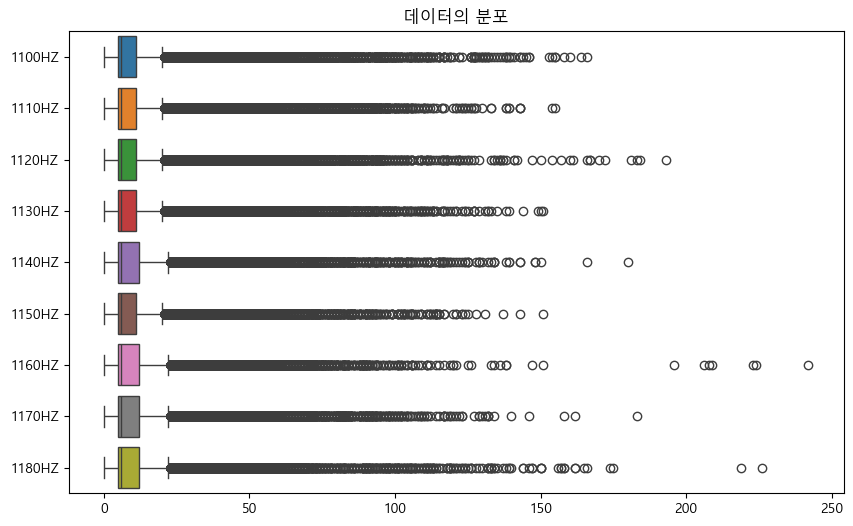

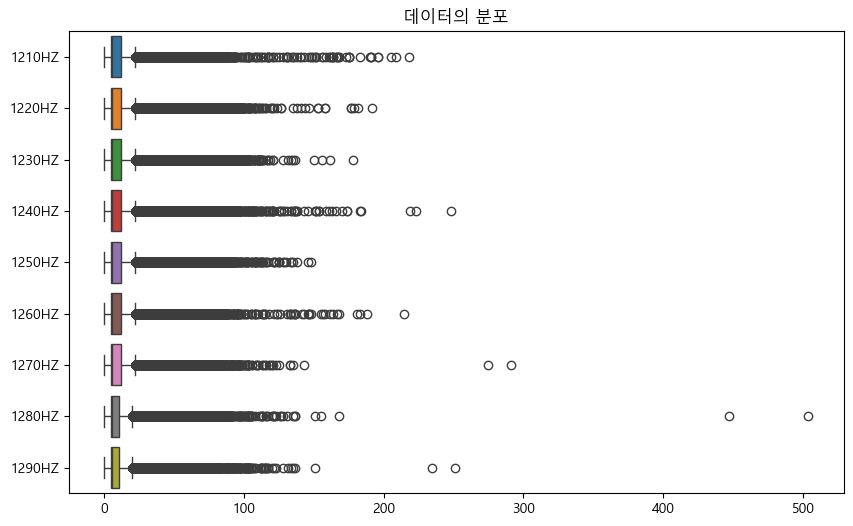

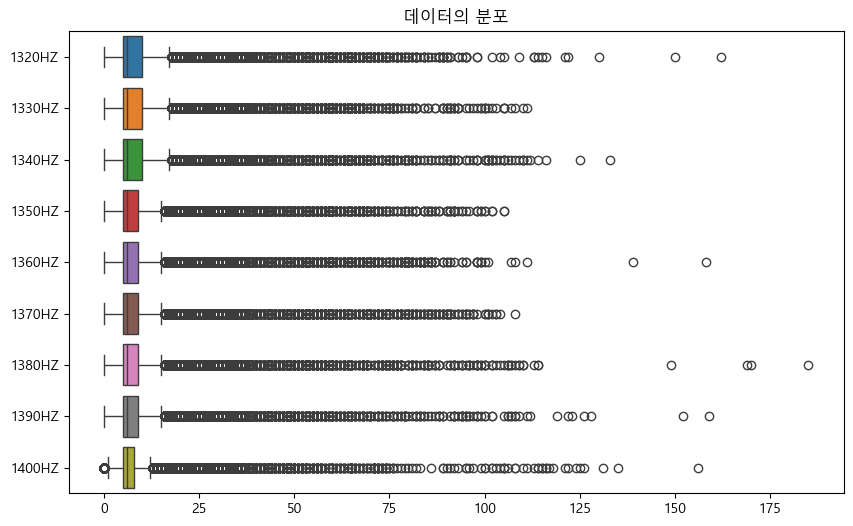

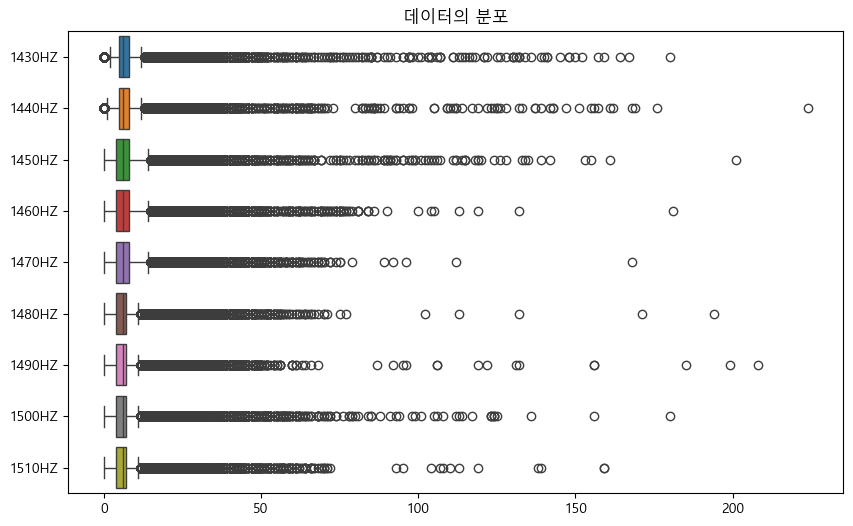

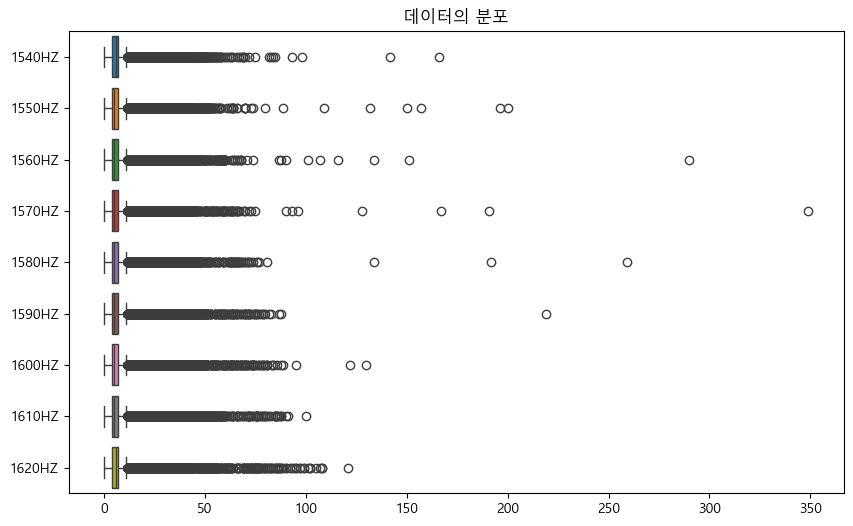

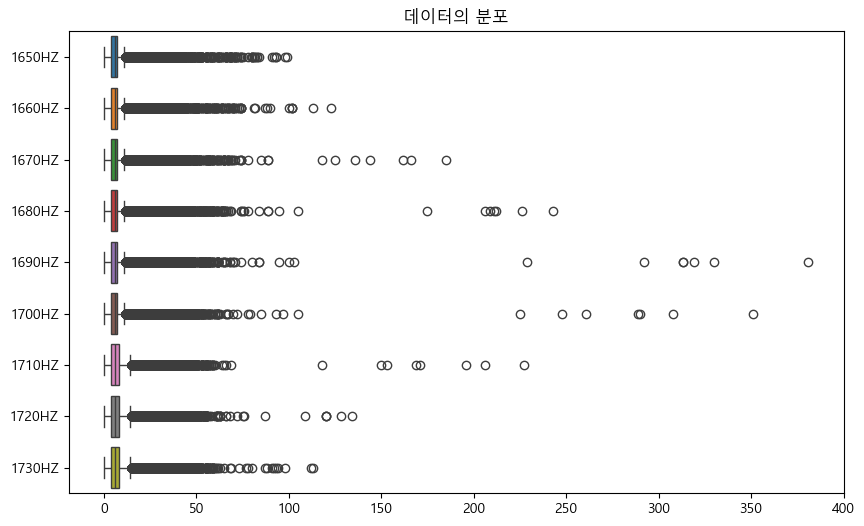

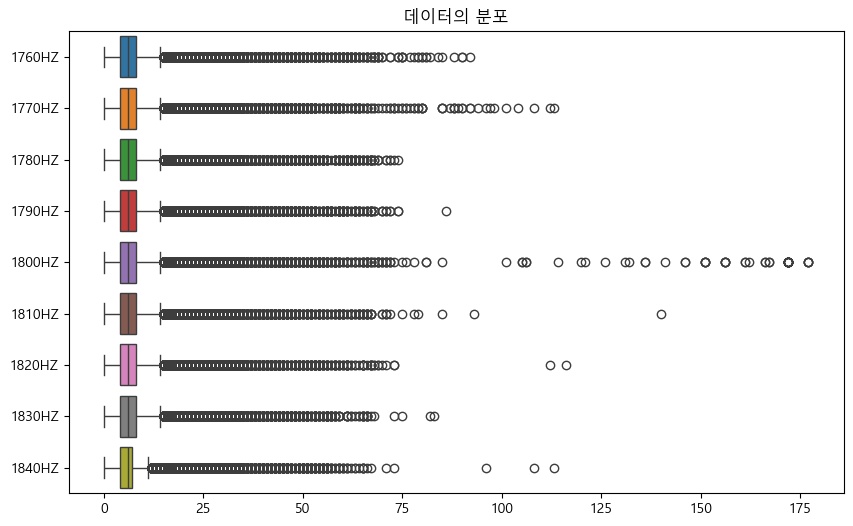

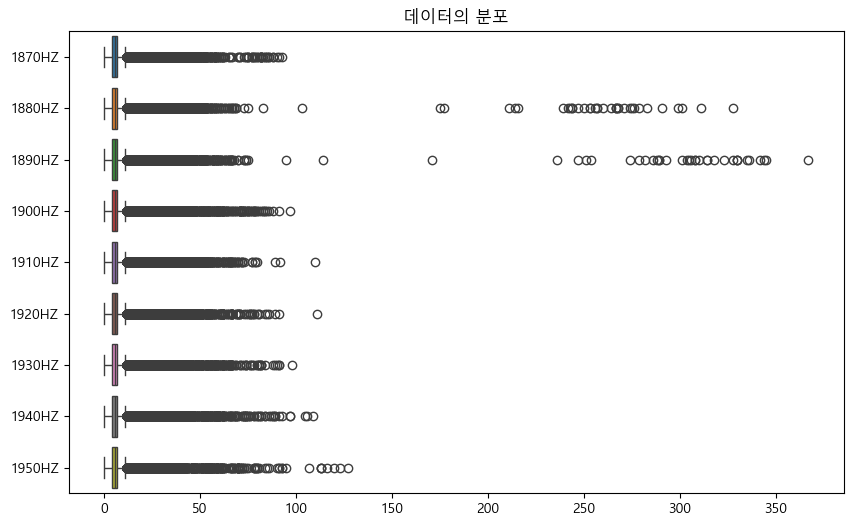

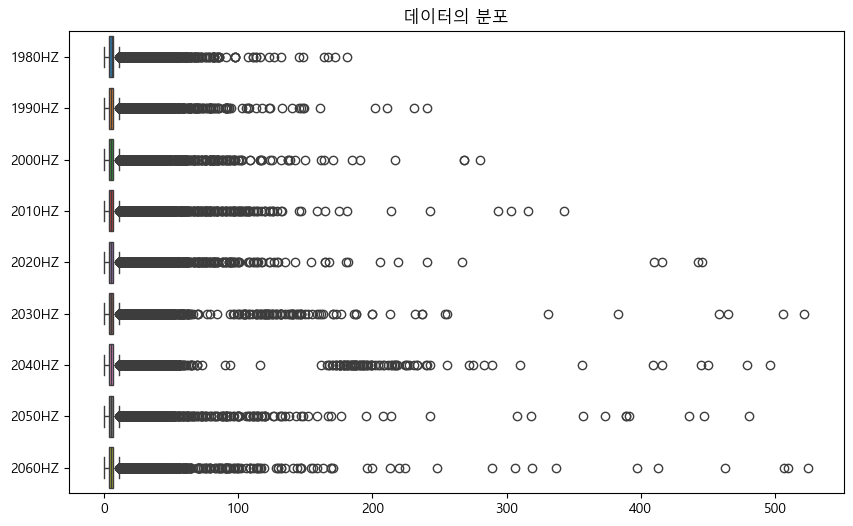

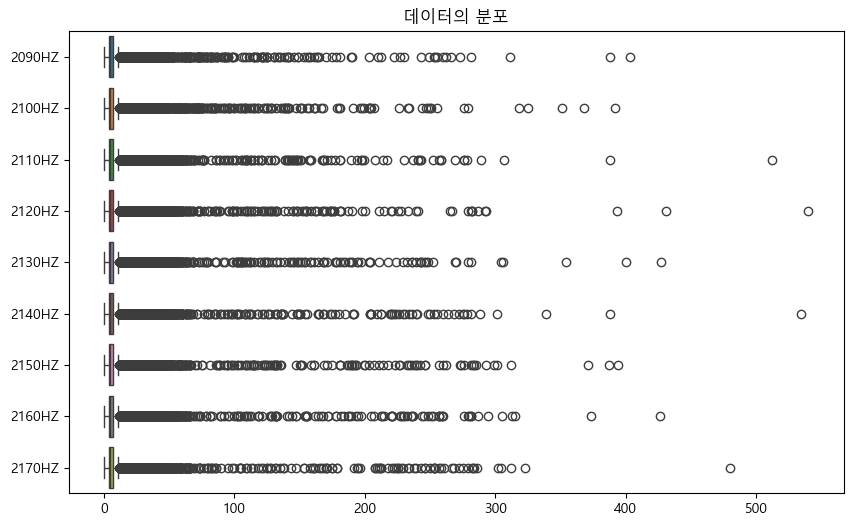

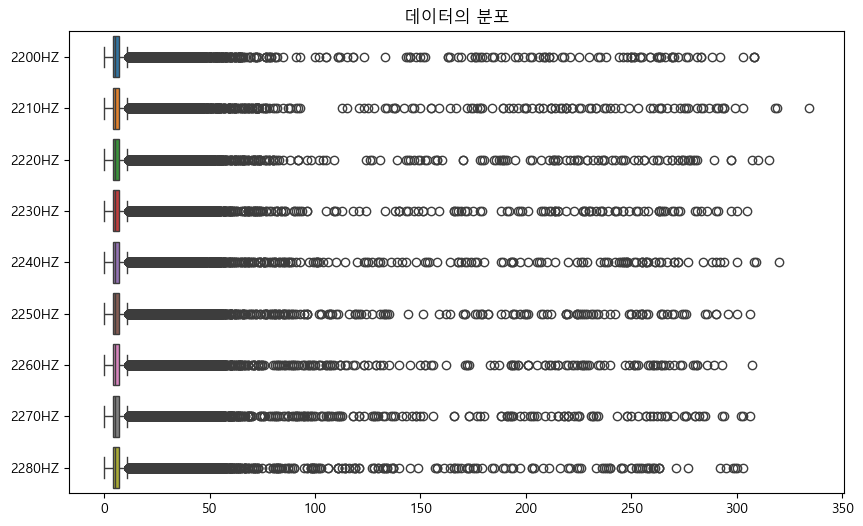

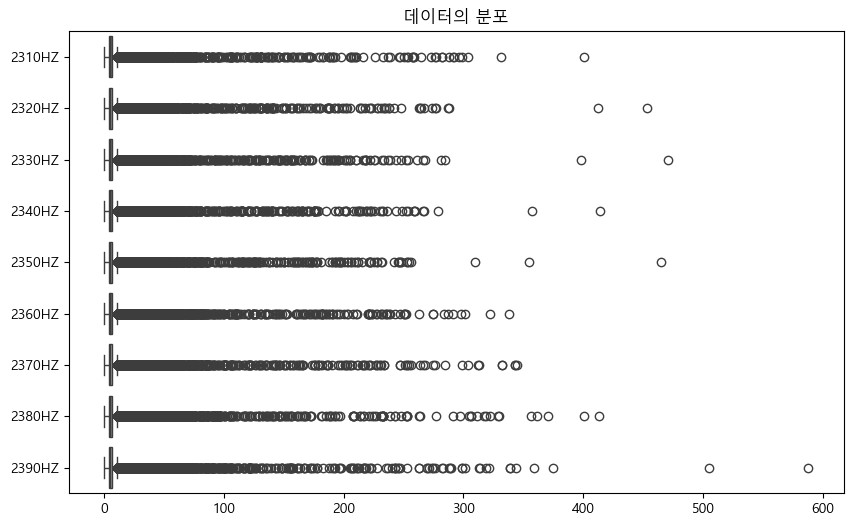

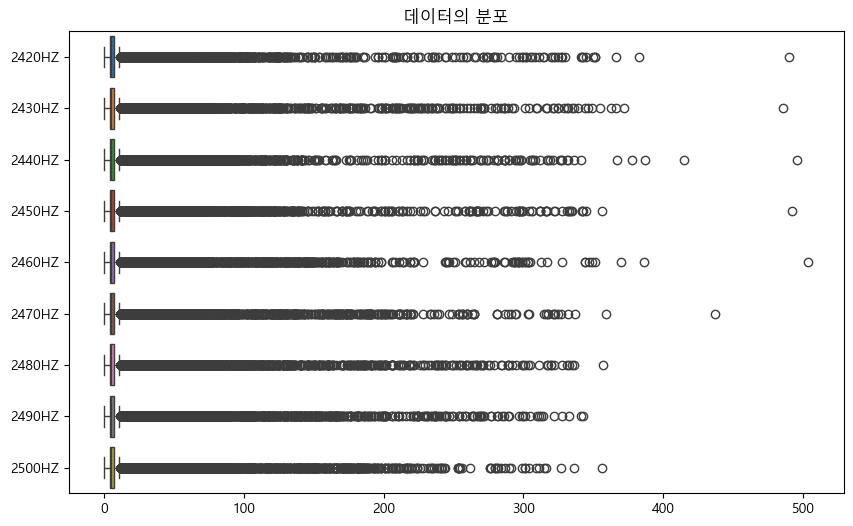

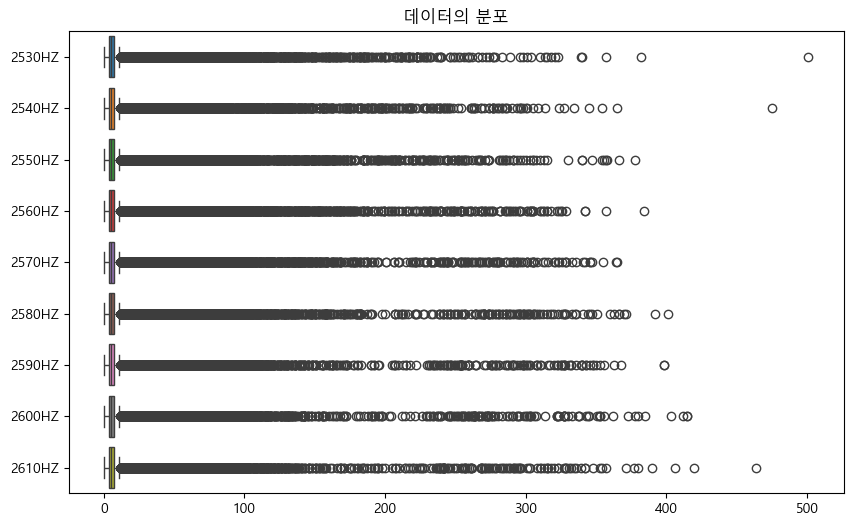

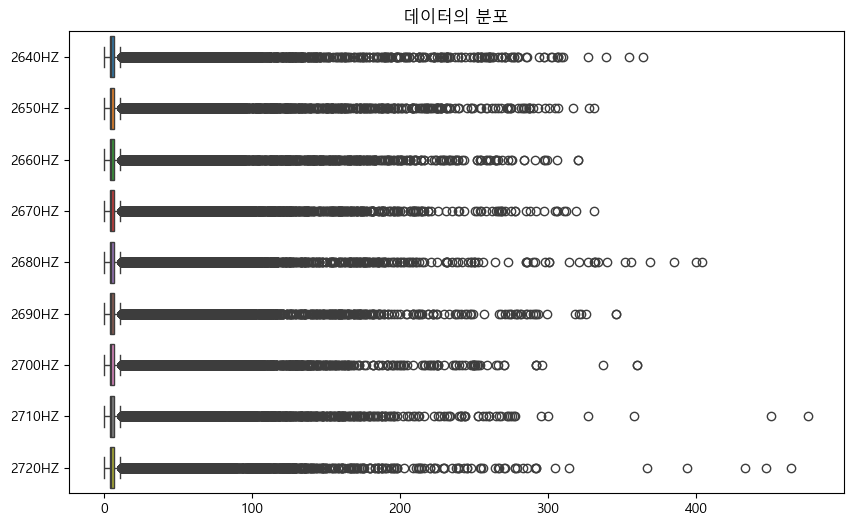

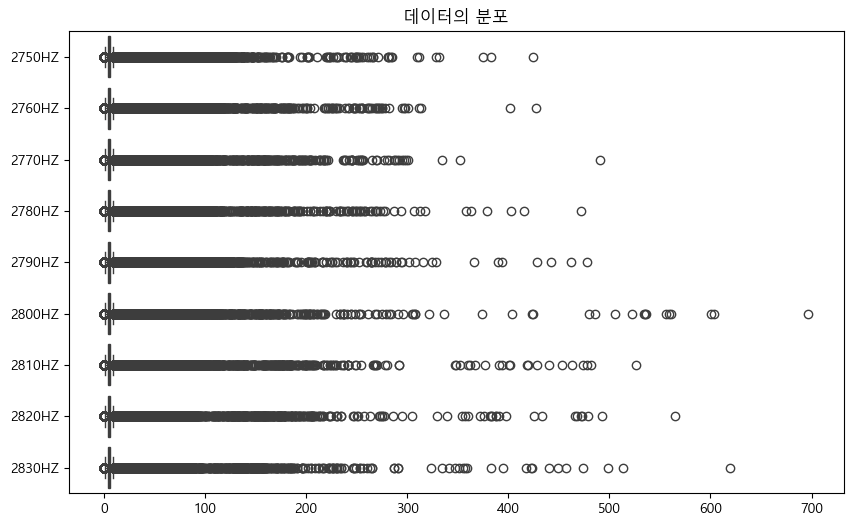

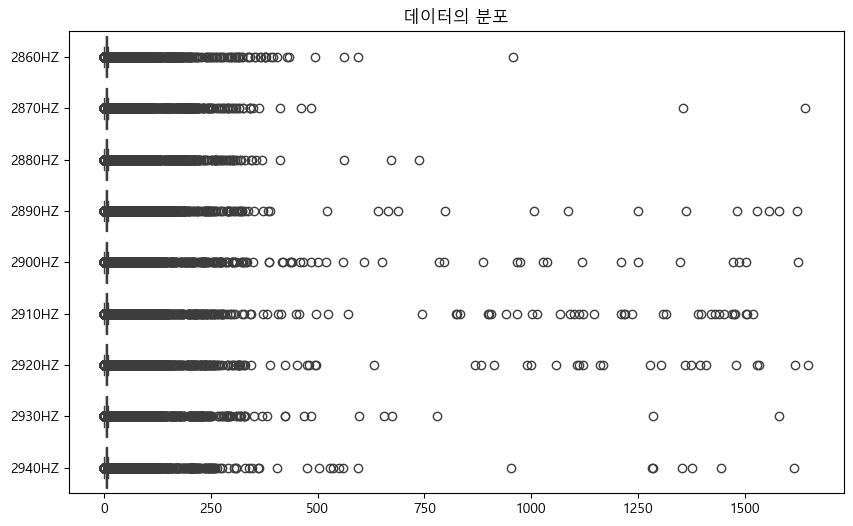

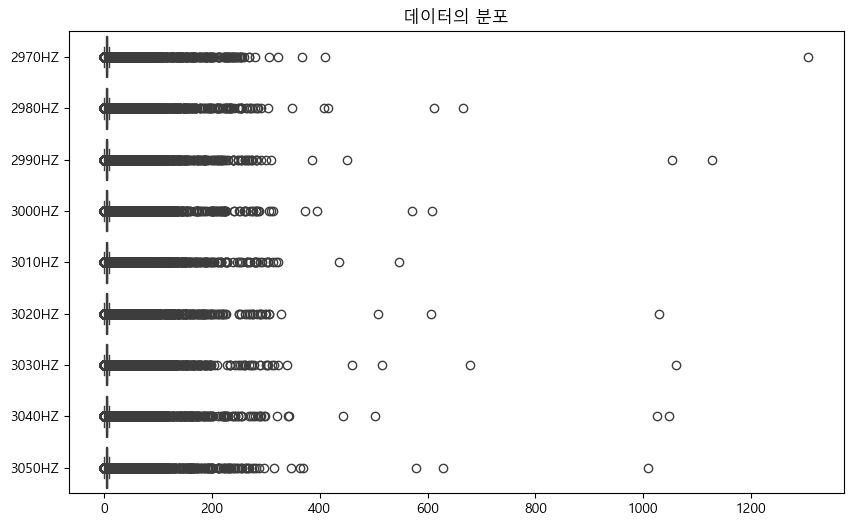

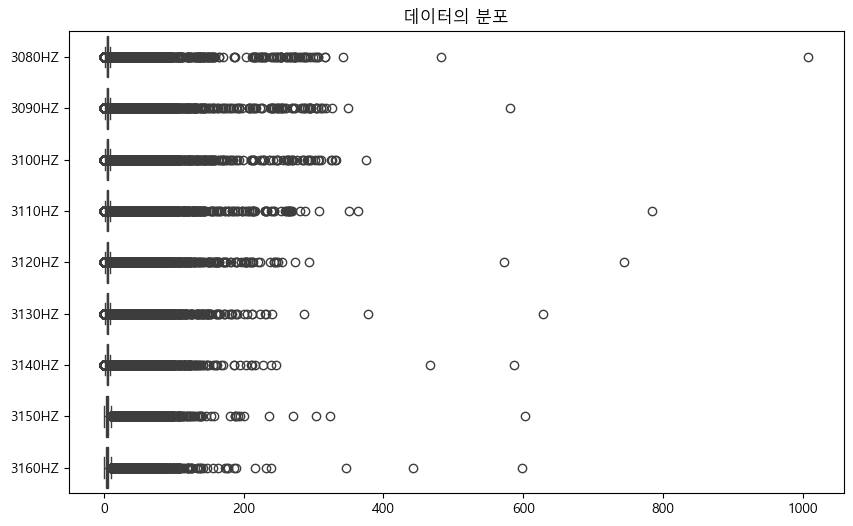

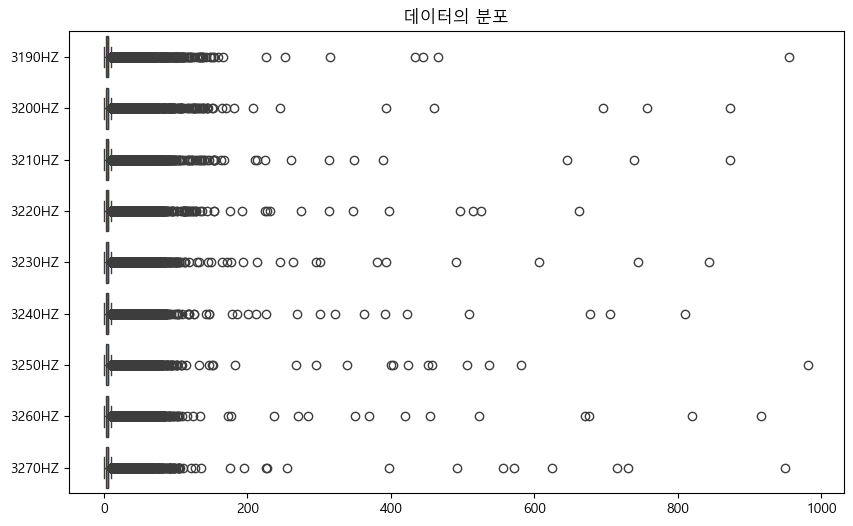

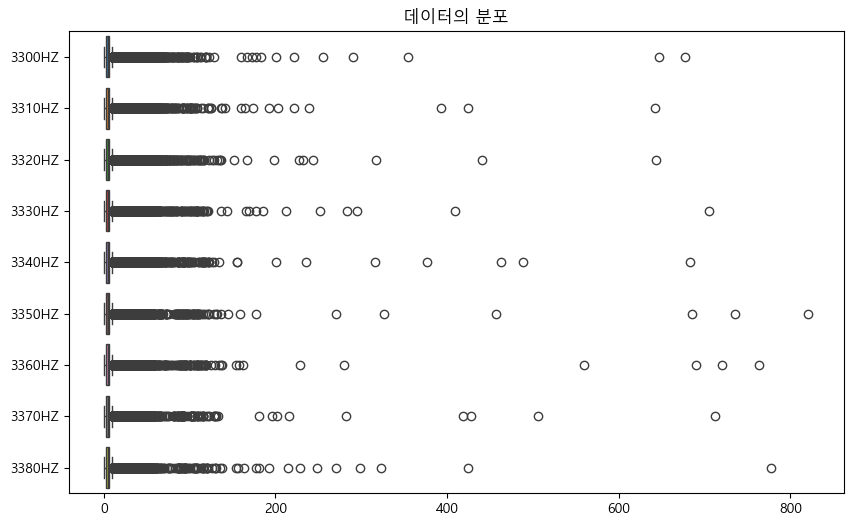

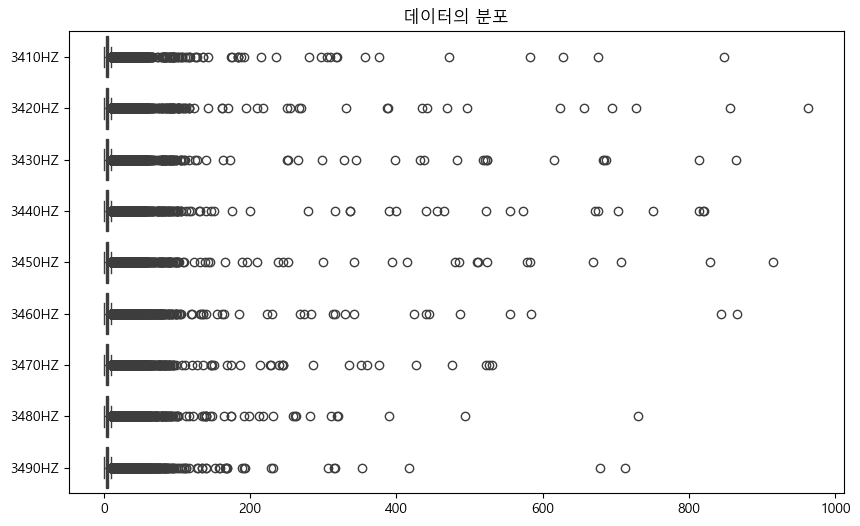

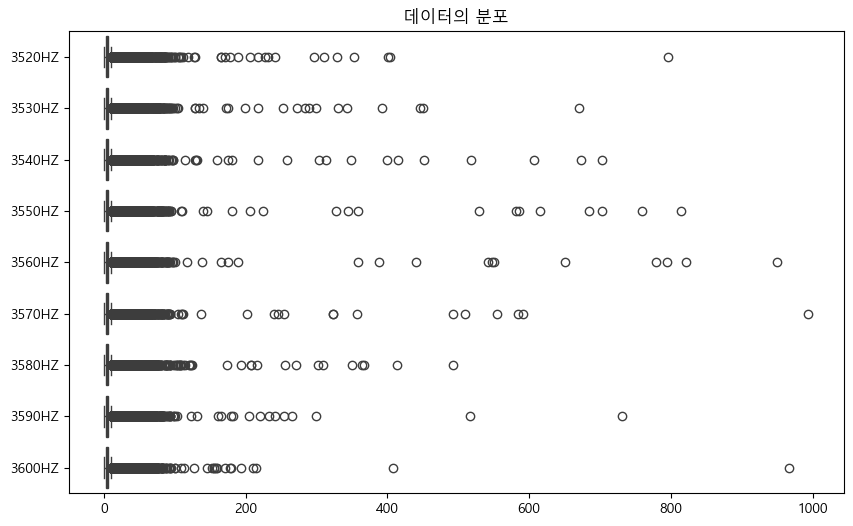

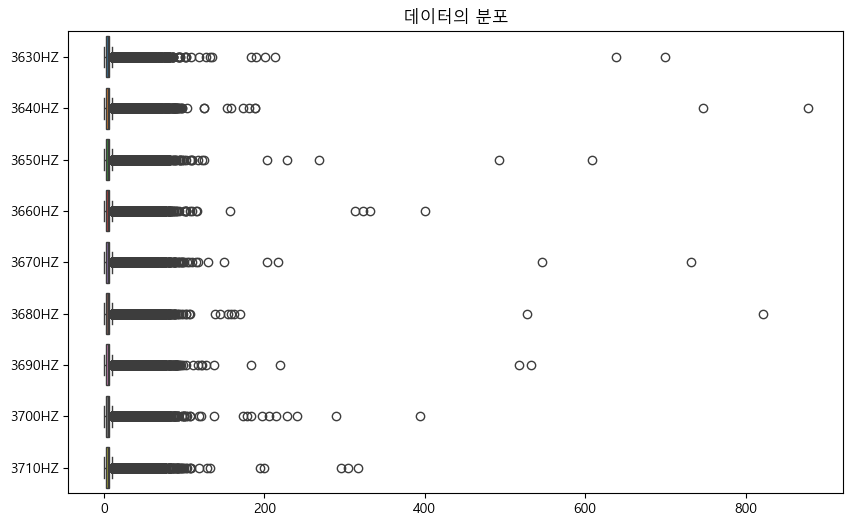

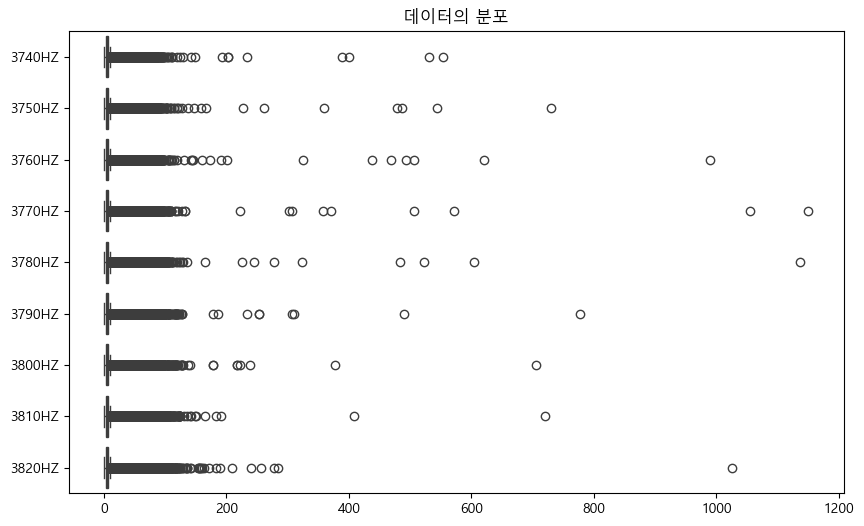

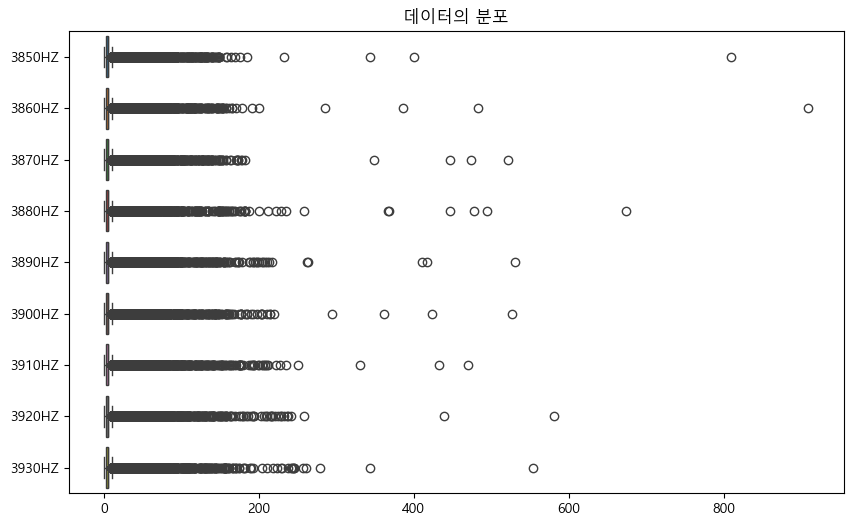

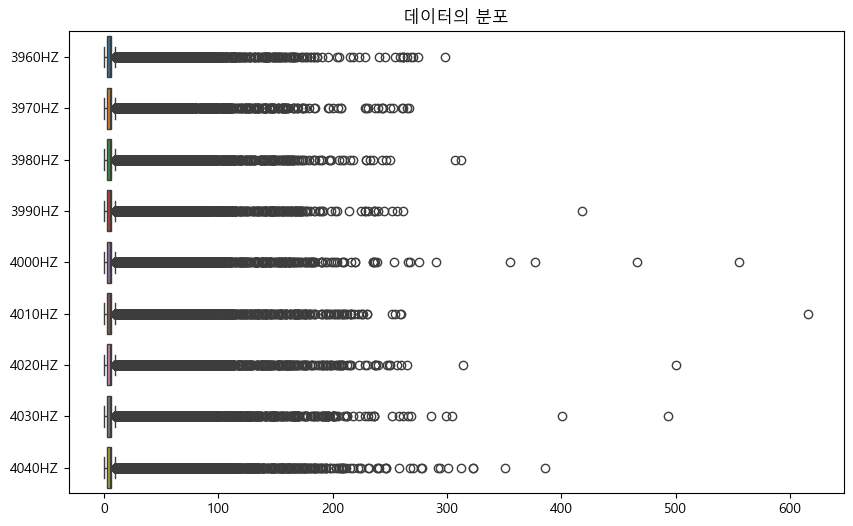

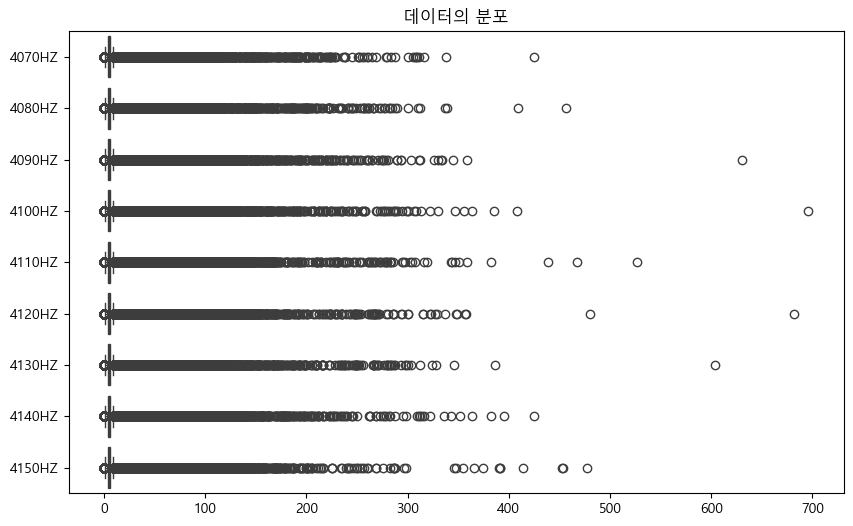

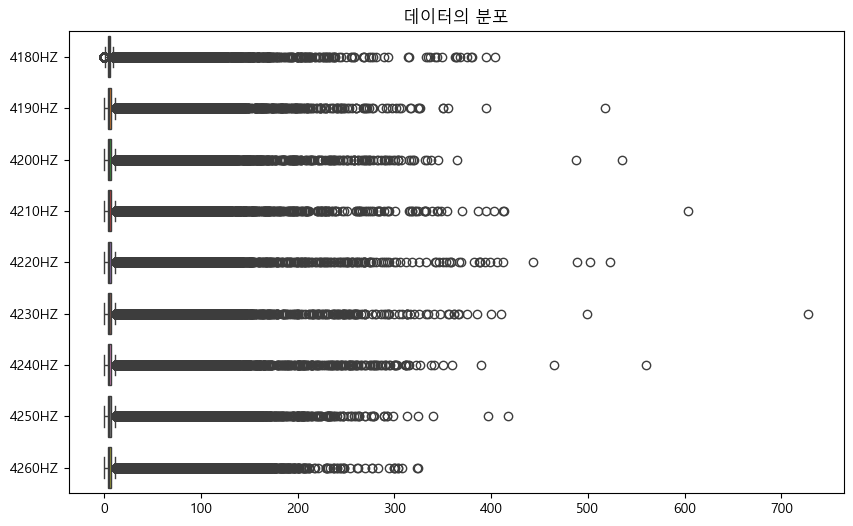

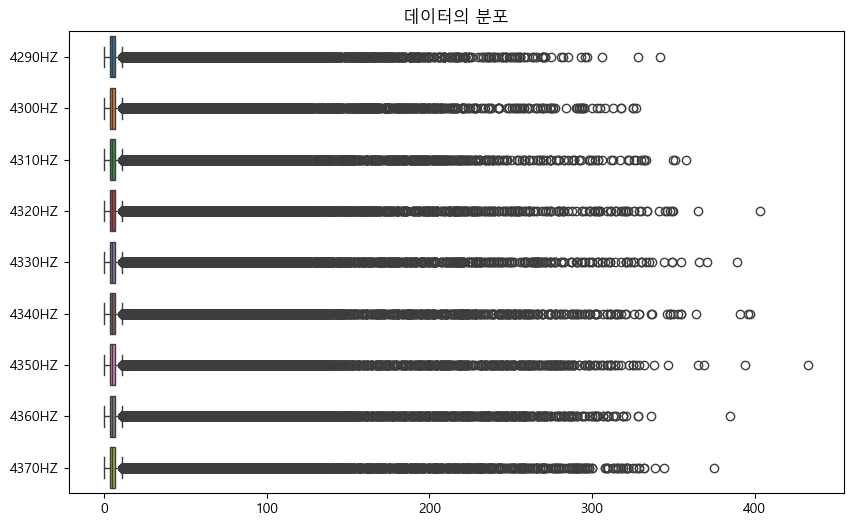

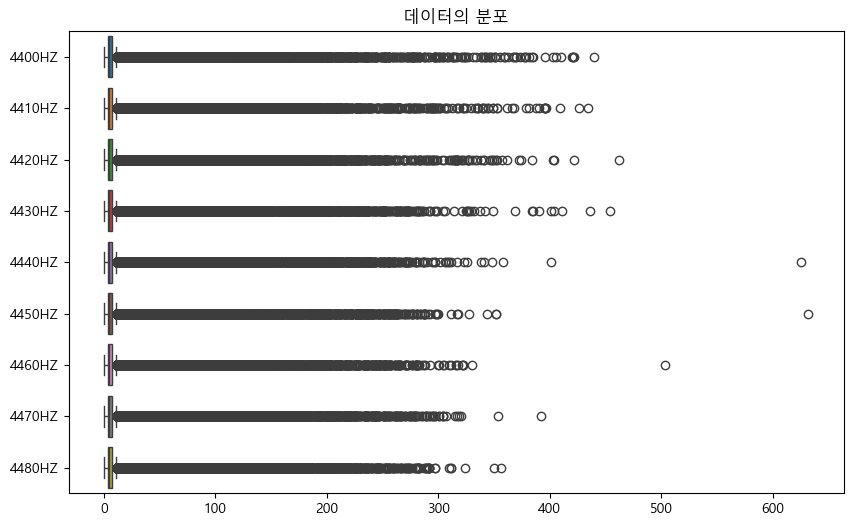

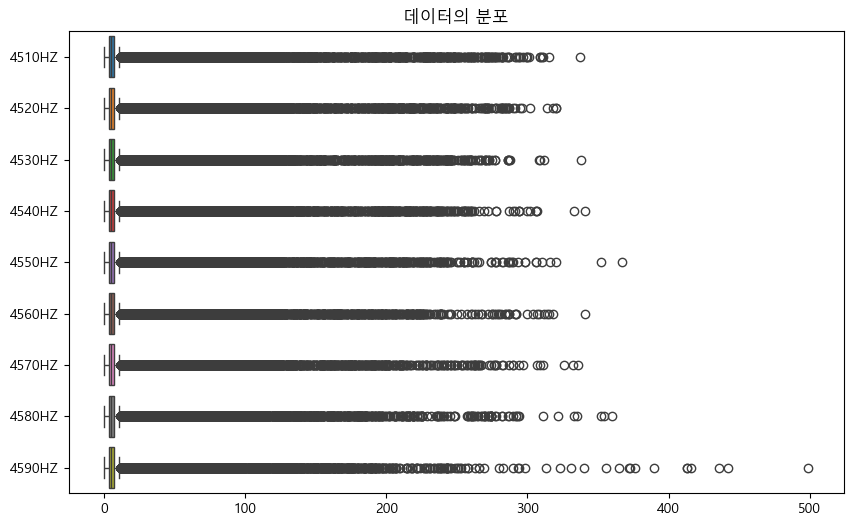

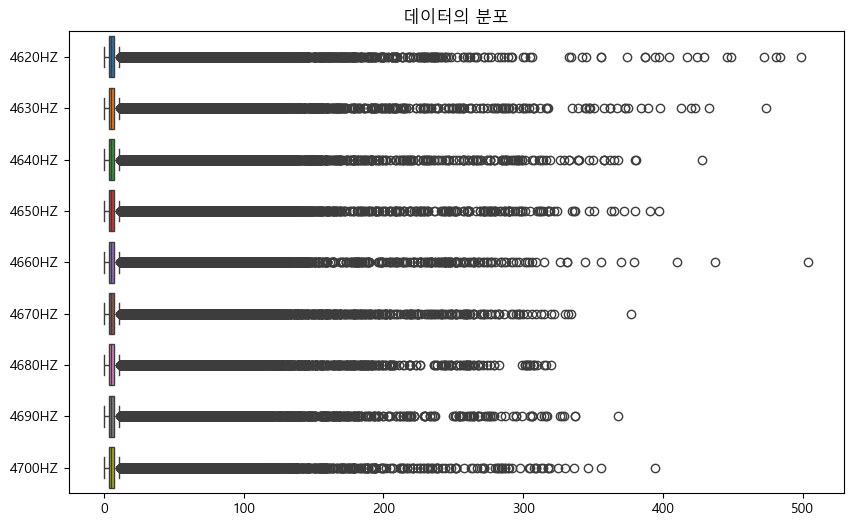

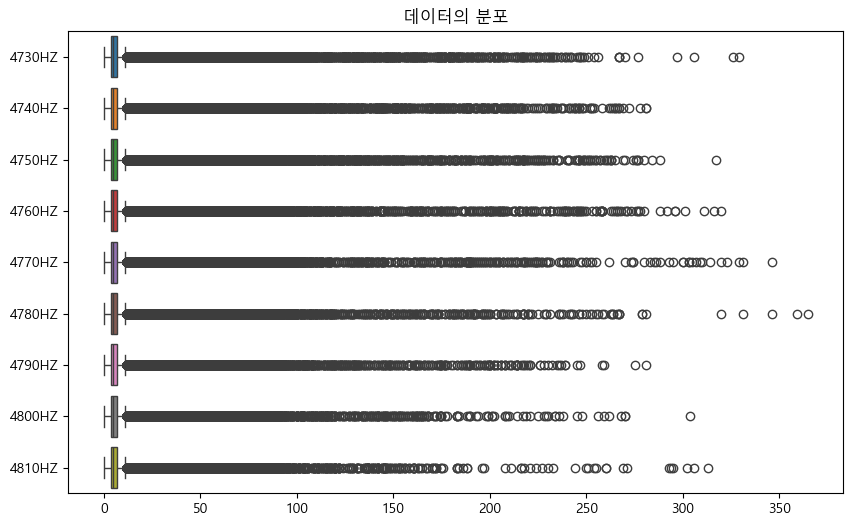

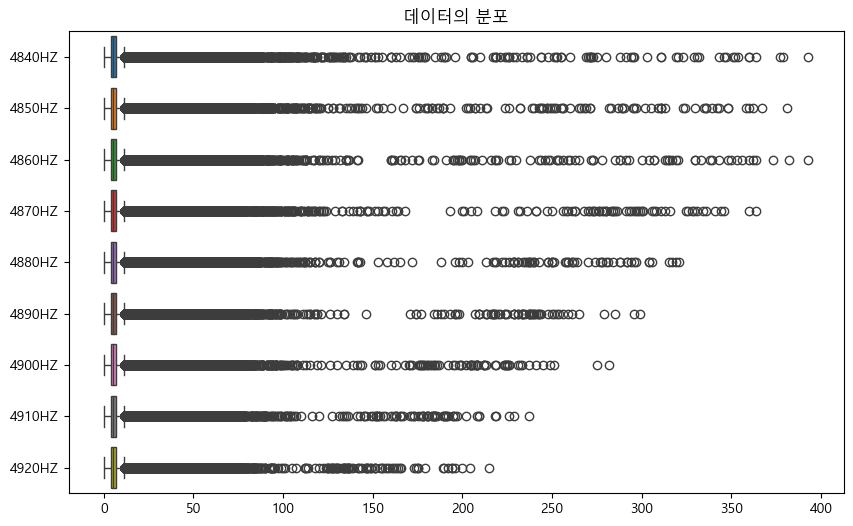

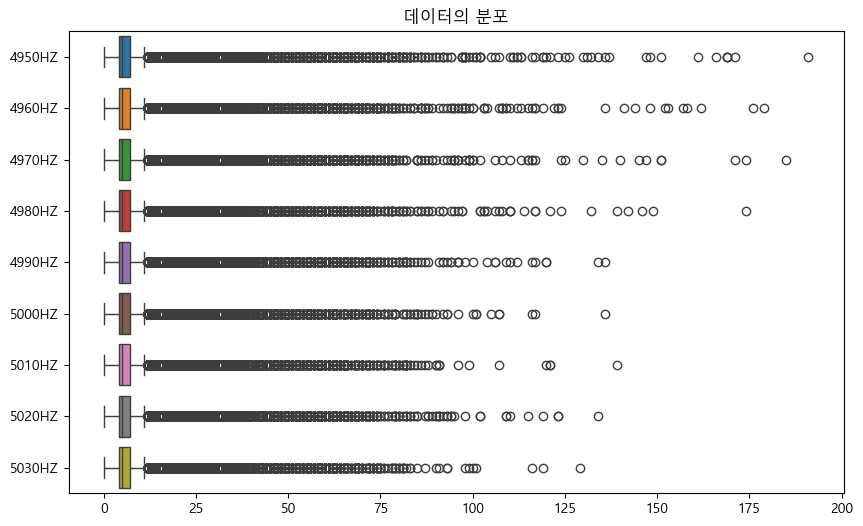

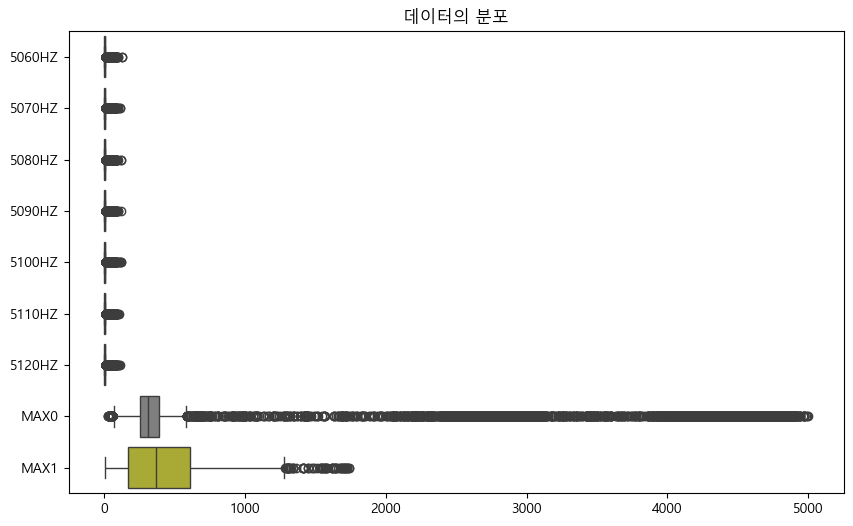

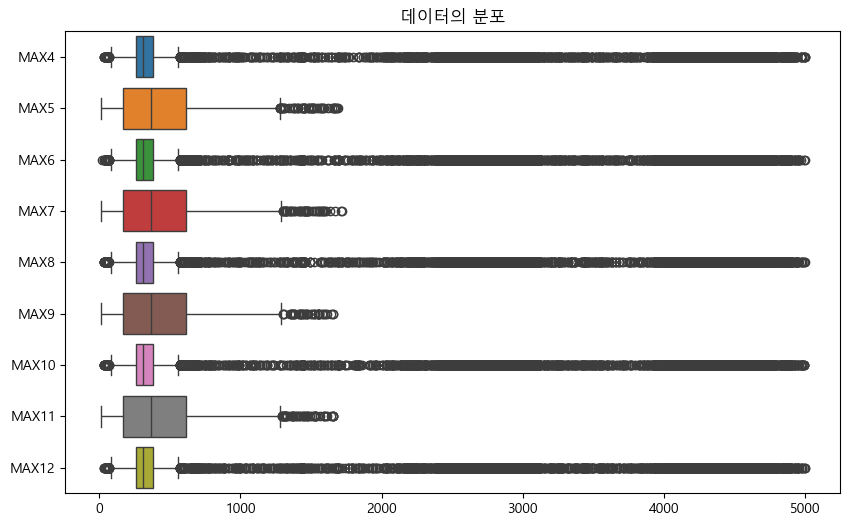

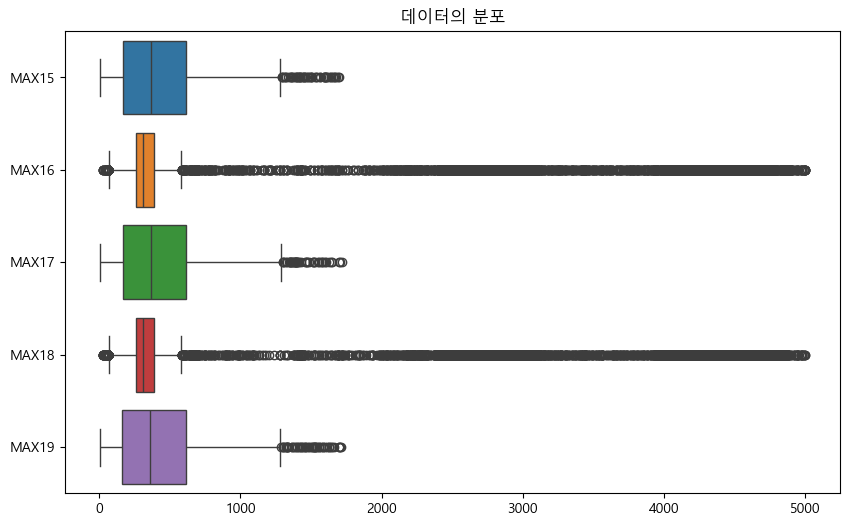

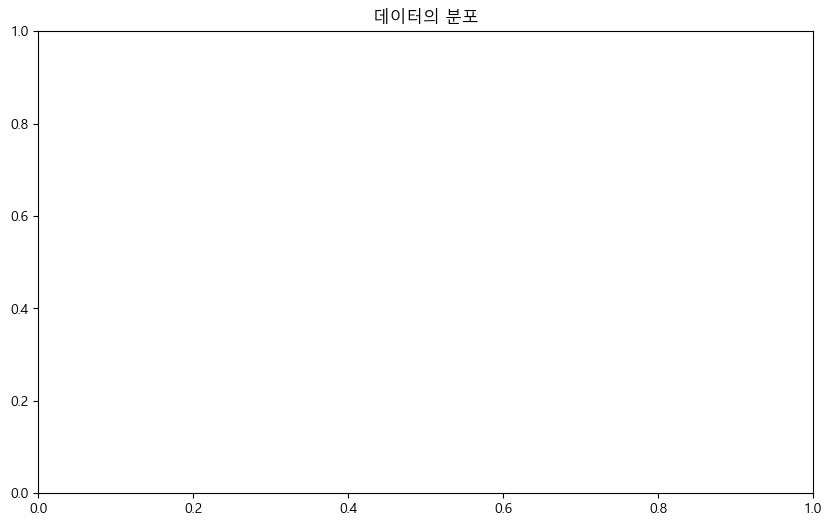

In [23]:
import seaborn as sns
n=0
for i in range(50):
    data = df.iloc[:, 6+n+i:15+n+i]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data,orient='h')
    plt.title('데이터의 분포')
    plt.show()
    n+=10


In [24]:
df.columns

Index(['site', 'sid', 'ldate', 'lrate', 'llevel', 'leaktype', '0HZ', '10HZ',
       '20HZ', '30HZ',
       ...
       'MAX10', 'MAX11', 'MAX12', 'MAX13', 'MAX14', 'MAX15', 'MAX16', 'MAX17',
       'MAX18', 'MAX19'],
      dtype='object', length=539)

In [25]:
df_melted = df.copy()

df_melted.set_index(['leaktype', 'site'], inplace=True)

df_melted

sid     ldate  lrate  llevel  0HZ  10HZ  \
leaktype site                                                                   
out      S-4687025030  S-0359369085120315  20200708     90     256    0    18   
         S-4677025028  S-0359369083968368  20190601     90     542    0     4   
         S-4673025027  S-0359369085133797  20201028     90     705    0     0   
         S-4772025022  S-0359369084117593  20200505     90     499    0     2   
         S-4729010102  S-0359369084010178  20200520     90     423    0     3   
...                                   ...       ...    ...     ...  ...   ...   
normal   S-2911010107  S-0359369084034657  20200813     30     433    0     3   
         S-4413110100  S-0359369081312338  20200613     60     249    0     4   
         S-4571025029  S-0359369084020284  20200730     40     309    0     4   
         S-4571025029  S-0359369084042338  20200729     40     381    0     4   
         S-2911010107  S-0359369084045786  20200805     30     142    0     5   

                       20HZ  30HZ  40HZ  50HZ  ...  MAX10  MAX11  MAX12  \
leaktype site                                  ...                        
out      S-4687025030    19    16    20    19  ...   4690    243   4710   
         S-4677025028     2     4     6     4  ...    310    423    300   
         S-4673025027     0     3     3     3  ...    240    751    240   
         S-4772025022     2     2     2     2  ...    370    549    360   
         S-4729010102     3     3     3     3  ...    400    521    400   
...                     ...   ...   ...   ...  ...    ...    ...    ...   
normal   S-2911010107     4     4     4     5  ...    260     68    260   
         S-4413110100     4     4     5     4  ...    420    179    440   
         S-4571025029     4     4     5     4  ...    250     46    250   
         S-4571025029     4     4     4     4  ...    300     35    300   
         S-2911010107     4     5     5     5  ...    250    166    260   

                       MAX13  MAX14  MAX15  MAX16  MAX17  MAX18  MAX19  
leaktype site                                                           
out      S-4687025030    284   4700    324   4670    230   4710    260  
         S-4677025028    711    270    412    270    531    290    538  
         S-4673025027    897    240    741    240    741    240    562  
         S-4772025022    427    370    800    370    552    370    458  
         S-4729010102    395    400    461    400    470    400    515  
...                      ...    ...    ...    ...    ...    ...    ...  
normal   S-2911010107     87    260    111    260    152    270     90  
         S-4413110100    243    440     44    440    327    440    248  
         S-4571025029     31    250    561    250    146    250    218  
         S-4571025029    154    300    426    300    544    300    336  
         S-2911010107     55    260    127    260    135    250     53  

[70384 rows x 537 columns]

In [26]:
leaktype_analysis = df.groupby('sid')['leaktype'].value_counts().unstack().fillna(0)

leaktype_analysis

leaktype,in,noise,normal,other,out
sid,,,,,
S-0035514005600295,31.0,0.0,0.0,0.0,0.0
S-0035514005600311,2.0,0.0,0.0,0.0,0.0
S-0035514005600354,36.0,0.0,0.0,0.0,0.0
S-0035514005600389,31.0,0.0,0.0,0.0,0.0
S-0035514005600391,54.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
S-0359369085870067,0.0,0.0,0.0,51.0,0.0
S-0359369085872121,14.0,0.0,0.0,0.0,0.0
S-0359369085872311,20.0,0.0,0.0,0.0,0.0


In [27]:
site_analysis = df.groupby('site')['leaktype'].value_counts().unstack().fillna(0)

site_analysis

leaktype,in,noise,normal,other,out
site,,,,,
S-2711010100,128.0,0.0,4566.0,113.0,101.0
S-2911010103,0.0,0.0,216.0,0.0,1.0
S-2911010105,0.0,0.0,0.0,0.0,82.0
S-2911010106,144.0,0.0,0.0,0.0,87.0
S-2911010107,0.0,0.0,3875.0,0.0,2.0
S-2911010109,0.0,0.0,14.0,0.0,63.0
S-3611010100,0.0,0.0,0.0,0.0,476.0
S-4180025322,85.0,0.0,0.0,0.0,385.0
S-4279025022,28.0,0.0,0.0,0.0,121.0


In [28]:
df.columns

Index(['site', 'sid', 'ldate', 'lrate', 'llevel', 'leaktype', '0HZ', '10HZ',
       '20HZ', '30HZ',
       ...
       'MAX10', 'MAX11', 'MAX12', 'MAX13', 'MAX14', 'MAX15', 'MAX16', 'MAX17',
       'MAX18', 'MAX19'],
      dtype='object', length=539)

입력변수 설정

In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(['site', 'sid', 'ldate','0HZ',"leaktype","MAX0", "MAX1","MAX2","MAX3",
             "MAX4", "MAX5","MAX6","MAX7",'MAX8',"MAX9", "MAX10", 
             'MAX11', 'MAX12', 'MAX13', 'MAX14', 'MAX15', 'MAX16', 'MAX17','MAX18', 'MAX19'], 
            axis=1)
y = df["leaktype"]

#train vs test 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class Mapping:", class_mapping)

Class Mapping: {'in': 0, 'noise': 1, 'normal': 2, 'other': 3, 'out': 4}


In [8]:




# 클래스불균형 해결해야하나?!
#rus = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
#print(X_resampled)
#print(y_resampled )


In [9]:
X

,lrate,llevel,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,90,256,18,19,16,20,19,17,16,20,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,90,542,4,2,4,6,4,6,8,8,...,310,423,300,711,270,412,270,531,290,538
2,90,705,0,0,3,3,3,3,5,14,...,240,751,240,897,240,741,240,741,240,562
3,90,499,2,2,2,2,2,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,90,423,3,3,3,3,3,3,3,5,...,400,521,400,395,400,461,400,470,400,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70379,30,433,3,4,4,4,5,4,4,4,...,260,68,260,87,260,111,260,152,270,90
70380,60,249,4,4,4,5,4,4,4,4,...,420,179,440,243,440,44,440,327,440,248
70381,40,309,4,4,4,5,4,4,4,4,...,250,46,250,31,250,561,250,146,250,218
70382,40,381,4,4,4,4,4,4,4,4,...,300,35,300,154,300,426,300,544,300,336


In [10]:
y_train.value_counts()

leaktype
normal    15525
out       13832
in        10488
other      5495
noise      3928
Name: count, dtype: int64

In [11]:
y_test.value_counts()

leaktype
normal    6641
out       5899
in        4444
other     2402
noise     1730
Name: count, dtype: int64

In [12]:
#y_resampled.value_counts()

In [40]:
# 정규화하기
from sklearn.preprocessing import Normalizer, MinMaxScaler

MM=MinMaxScaler()
X_train_scaled=MM.fit_transform(X_train)
X_test_scaled=MM.transform(X_test)

In [41]:
df['leaktype'].unique()

array(['out', 'in', 'noise', 'other', 'normal'], dtype=object)

ML모델 분석

In [42]:
#사용할 분석 모델 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [43]:
def print_metrics(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) *100
    np.set_printoptions(precision=2, suppress=True)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Normalized Confusion Matrix(%):\n", normalized_conf_matrix)
    print("\nAccuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return {'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]},{'Normalized Confusion Matrix': [normalized_conf_matrix]} 

In [12]:
import time

def get_model_prediction(model, X_train, y_train,X_test,y_test):
    s_time=time.time()
    print('#####', model.__class__.__name__, "#####")

    # Train set
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    print("Train set:")
    train_dict,train_matrix=print_metrics(y_train, y_train_pred)

    # Test set
    y_test_pred = model.predict(X_test)
    print("\nTest set:")
    test_dict,test_matrix = print_metrics(y_test, y_test_pred)
    e_time=time.time()
    run_time=e_time-s_time
    print(f"{run_time:.2f}sec")
    return train_dict, train_matrix, y_train_pred, test_dict, test_matrix,y_test_pred

In [38]:
#하이퍼파라미터 튜닝 
from sklearn.model_selection import GridSearchCV
import time
claaifiers = [
    ( LogisticRegression(multi_class='multinomial'), {
    'C': [ 0.01, 0.1, 1, 10, 100],
    'max_iter': [2000,3000],
    'solver': ['sag', 'saga']}),
    (KNeighborsClassifier(), {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'leaf_size':[20,30,40]}),
    (MultinomialNB(),{
    'alpha': [0.1, 0.5, 1.0]}),
    (AdaBoostClassifier(),  {
    'n_estimators': [100, 200, 300,400],
    'learning_rate': [0.001, 0.01, 0.1, 1]})
]

best_models=[]
for claaifier, param_grid in claaifiers:
    s_time=time.time()
    print(claaifier.__class__.__name__)
    
    # Perform grid search
    grid_search = GridSearchCV(estimator=claaifier, param_grid=param_grid, cv=4, verbose=2, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    print("Best parameters found:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    best_models.append((claaifier.__class__.__name__, best_model))
    e_time=time.time()
    run_time=e_time-s_time
    print(f"{run_time:.2f}sec")


LogisticRegression
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters found: {'C': 100, 'max_iter': 3000, 'solver': 'saga'}
Best score: 0.6794268084760899
1017.16sec
KNeighborsClassifier
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best parameters found: {'leaf_size': 20, 'n_neighbors': 1, 'weights': 'uniform'}
Best score: 0.8888731022164488
193.92sec
MultinomialNB
Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best parameters found: {'alpha': 0.5}
Best score: 0.5198100186733783
0.97sec
AdaBoostClassifier
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best parameters found: {'learning_rate': 1, 'n_estimators': 300}
Best score: 0.6468498822765284
1079.57sec


In [39]:
best_models

[('LogisticRegression',
  LogisticRegression(C=100, max_iter=3000, multi_class='multinomial',
                     solver='saga')),
 ('KNeighborsClassifier', KNeighborsClassifier(leaf_size=20, n_neighbors=1)),
 ('MultinomialNB', MultinomialNB(alpha=0.5)),
 ('AdaBoostClassifier', AdaBoostClassifier(learning_rate=1, n_estimators=300))]

In [40]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "3"

all_train_dataframes = []  
all_test_dataframes = []
train_conf_matrix=[]
test_conf_matrix=[]
for model_name, model in best_models:
    train_dict, train_matrix, y_train_pred, test_dict, test_matrix,y_test_pred=get_model_prediction(model,X_train_scaled,y_train,X_test_scaled,y_test)
    train_df = pd.DataFrame(train_dict)
    test_df = pd.DataFrame(test_dict)
    
    train_conf_matrix.append(train_matrix)
    test_conf_matrix.append(test_matrix)
    
    all_train_dataframes.append(train_df)
    all_test_dataframes.append(test_df)
    
final_train_df = pd.concat(all_train_dataframes, axis=0)
final_test_df = pd.concat(all_test_dataframes, axis=0)
a=pd.concat([final_train_df,final_test_df],axis=1)

##### LogisticRegression #####
Train set:
Normalized Confusion Matrix(%):
 [[ 73.76  17.55   5.     3.68   0.  ]
 [ 39.49  51.12   5.09   4.3    0.  ]
 [ 29.2   18.84  45.88   6.08   0.  ]
 [ 44.19  20.98   8.97  25.86   0.  ]
 [  0.     0.     0.     0.   100.  ]]

Accuracy: 0.6964358204108143
Precision: 0.6941286374837529
Recall: 0.6964358204108143
F1 Score: 0.6863381232390793

Test set:
Normalized Confusion Matrix(%):
 [[ 70.89  19.66   5.14   4.31   0.  ]
 [ 40.5   48.72   5.56   5.22   0.  ]
 [ 28.5   21.1   43.58   6.82   0.  ]
 [ 47.42  20.82   9.03  22.73   0.  ]
 [  0.     0.     0.     0.   100.  ]]

Accuracy: 0.6766433036559955
Precision: 0.6713066861809409
Recall: 0.6766433036559955
F1 Score: 0.6659338520489883
439.85sec
##### KNeighborsClassifier #####
Train set:
Normalized Confusion Matrix(%):
 [[100.   0.   0.   0.   0.]
 [  0. 100.   0.   0.   0.]
 [  0.   0. 100.   0.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0.   0. 100.]]

Accuracy: 1.0
Precision: 1.0
Recall: 1

In [41]:
a

,Accuracy,Precision,Recall,F1 Score,Accuracy,Precision,Recall,F1 Score
0,0.696436,0.694129,0.696436,0.686338,0.676643,0.671307,0.676643,0.665934
0,1.000000,1.000000,1.000000,1.000000,0.894440,0.893756,0.894440,0.893939
0,0.519729,0.513696,0.519729,0.441638,0.519464,0.518125,0.519464,0.441574
0,0.645896,0.639435,0.645896,0.634546,0.641694,0.633592,0.641694,0.630309


In [42]:
train_conf_matrix

[{'Normalized Confusion Matrix': [array([[ 73.76,  17.55,   5.  ,   3.68,   0.  ],
          [ 39.49,  51.12,   5.09,   4.3 ,   0.  ],
          [ 29.2 ,  18.84,  45.88,   6.08,   0.  ],
          [ 44.19,  20.98,   8.97,  25.86,   0.  ],
          [  0.  ,   0.  ,   0.  ,   0.  , 100.  ]])]},
 {'Normalized Confusion Matrix': [array([[100.,   0.,   0.,   0.,   0.],
          [  0., 100.,   0.,   0.,   0.],
          [  0.,   0., 100.,   0.,   0.],
          [  0.,   0.,   0., 100.,   0.],
          [  0.,   0.,   0.,   0., 100.]])]},
 {'Normalized Confusion Matrix': [array([[67.59,  1.31, 16.01,  0.15, 14.94],
          [58.18,  3.2 , 17.07,  0.56, 20.99],
          [45.49,  3.72, 41.04,  0.25,  9.5 ],
          [51.88,  2.13, 24.29,  1.73, 19.96],
          [ 8.23,  0.06,  0.16,  0.  , 91.56]])]},
 {'Normalized Confusion Matrix': [array([[ 68.53,  21.15,   4.73,   5.6 ,   0.  ],
          [ 50.62,  37.73,   6.22,   5.43,   0.  ],
          [ 33.91,  15.45,  41.27,   9.37,   0.  ],
   

In [43]:
test_conf_matrix

[{'Normalized Confusion Matrix': [array([[ 70.89,  19.66,   5.14,   4.31,   0.  ],
          [ 40.5 ,  48.72,   5.56,   5.22,   0.  ],
          [ 28.5 ,  21.1 ,  43.58,   6.82,   0.  ],
          [ 47.42,  20.82,   9.03,  22.73,   0.  ],
          [  0.  ,   0.  ,   0.  ,   0.  , 100.  ]])]},
 {'Normalized Confusion Matrix': [array([[90.08,  4.63,  2.32,  2.9 ,  0.07],
          [ 7.47, 85.51,  3.08,  3.87,  0.07],
          [13.29, 10.  , 70.69,  5.95,  0.06],
          [ 8.62,  6.7 ,  4.2 , 80.35,  0.12],
          [ 0.12,  0.09,  0.03,  0.08, 99.68]])]},
 {'Normalized Confusion Matrix': [array([[67.96,  1.75, 15.32,  0.15, 14.82],
          [56.3 ,  3.15, 17.24,  0.59, 22.73],
          [46.65,  3.06, 40.81,  0.12,  9.36],
          [53.62,  1.67, 24.94,  2.16, 17.61],
          [ 8.45,  0.06,  0.21,  0.  , 91.28]])]},
 {'Normalized Confusion Matrix': [array([[ 67.96,  21.39,   4.92,   5.73,   0.  ],
          [ 48.87,  38.95,   6.46,   5.72,   0.  ],
          [ 32.66,  18.44,  37

DL모델 분석

In [13]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable



device(type='cuda', index=0)

In [14]:
import torch
import torch.autograd as autograd
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import optuna

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [15]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(1).to(device)
        self.y = torch.tensor(y, dtype=torch.long).to(device)
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [16]:
X_train_scaled.shape
batch_size=64


In [17]:
train_dataset = CustomDataset(X_train_scaled, y_train_encoded)
test_dataset = CustomDataset(X_test_scaled, y_test_encoded)

train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [18]:
for inputs, labels in train_loader:
    print("Training Shape", inputs.shape, labels.shape)
    break  # 첫 번째 배치만 확인

for inputs, labels in test_loader:
    print("Testing Shape", inputs.shape, labels.shape)
    break  # 전체 테스트 데이터셋 확인

Training Shape torch.Size([64, 1, 534]) torch.Size([64])
Testing Shape torch.Size([21116, 1, 534]) torch.Size([21116])


In [19]:
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, batch_size):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, bidirectional=True, batch_first=True) 
        self.fc = nn.Linear(hidden_size*2, num_classes) 
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)).to(device)  
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)).to(device)                  
        out, _ = self.lstm(x, (h_0, c_0)) 
        out = self.fc(out[:, -1, :])               

        return out


In [20]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, batch_size):
        super(GRU, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) 
        self.fc_1 =  nn.Linear(hidden_size, 128) 
        self.fc = nn.Linear(128, num_classes) 
        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) 
        output, (hn) = self.gru(x, (h_0)) 
        hn = hn.view(-1, self.hidden_size) 
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out) 
        return out

In [21]:
num_epochs = 100
learning_rate = 0.001 
batch_size=64
input_size = 534
hidden_size = 2 
num_layers = 1 
num_classes = 5

model = biLSTM(num_classes, input_size, hidden_size, num_layers, batch_size).to(device) 

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [22]:
def train_loop(train_loader, model, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    all_train_labels = []
    all_train_predictions = []
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels.data)
        all_train_labels.extend(labels.cpu().numpy())
        all_train_predictions.extend(preds.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_preds.double() / len(train_loader.dataset)

    return train_loss, train_accuracy,all_train_labels,all_train_predictions

In [23]:
def test_loop(test_loader, model, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_preds = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(preds.cpu().numpy())

    test_loss = running_loss / len(test_loader)
    test_accuracy = correct_preds.double() / len(test_loader.dataset)

    return test_loss, test_accuracy,all_labels,all_predictions

In [112]:
for epoch in range(num_epochs):
    s_time=time.time()
    train_loss, train_accuracy,all_train_labels,all_train_predictions = train_loop(train_loader, model, criterion, optimizer, device)

    test_loss, test_accuracy,all_labels,all_predictions = test_loop(test_loader, model, criterion, device)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
        print("=" * 30)
e_time=time.time()
run_time=e_time-s_time
print(f"{run_time:.2f}sec")
print(f"Epoch {epoch + 1}/{num_epochs}")
print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
print("=" * 30)
print("train")
train_dict,train_matrix=print_metrics(all_train_labels,all_train_predictions)
print("=" * 30)
print("test")
test_dict,test_matrix=print_metrics(all_labels,all_predictions)

Epoch 50/100
Train Loss: 0.5258, Accuracy: 0.7836
Test Loss: 0.6006, Accuracy: 0.7554
Epoch 100/100
Train Loss: 0.5151, Accuracy: 0.7890
Test Loss: 0.5992, Accuracy: 0.7560
1.50sec
Epoch 100/100
Train Loss: 0.5151, Accuracy: 0.7890
Test Loss: 0.5992, Accuracy: 0.7560
train
Normalized Confusion Matrix(%):
 [[66.19  4.55  0.08  6.4  22.79]
 [14.69 61.13  0.03  8.88 15.27]
 [ 0.01  0.01 99.98  0.    0.  ]
 [18.51  8.44  0.   49.37 23.68]
 [11.28  3.25  0.02  3.8  81.66]]

Accuracy: 0.7890111228383535
Precision: 0.7862158821655274
Recall: 0.7890111228383535
F1 Score: 0.7857629014704268
test
Normalized Confusion Matrix(%):
 [[63.19  4.1   0.16  6.19 26.37]
 [20.64 49.02  0.   10.58 19.77]
 [ 0.09  0.02 99.85  0.    0.05]
 [21.57  6.29  0.04 40.63 31.47]
 [13.88  2.85  0.03  3.56 79.67]]

Accuracy: 0.755967039211972
Precision: 0.7524118932245566
Recall: 0.755967039211972
F1 Score: 0.750058914184154


In [116]:
import optuna
import time

def objective(trial):
    batch_size = trial.suggest_int('batch_size',  64, 128)
    hidden_size = trial.suggest_int('hidden_size', 2, 128)
    num_epochs = trial.suggest_int('num_epochs', 100,500)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # 모델 초기화
    model = biLSTM(num_classes, input_size, hidden_size, num_layers, batch_size).to(device)

    # 옵티마이저 및 손실 함수 설정
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # 훈련 및 검증 데이터셋 및 로더 설정
    train_dataset = CustomDataset(X_train_scaled, y_train_encoded)
    test_dataset = CustomDataset(X_test_scaled, y_test_encoded)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

    # 훈련 루프 및 테스트 루프 실행
    for epoch in range(num_epochs):
        train_loss, train_accuracy,all_train_labels,all_train_predictions= train_loop(train_loader, model, criterion, optimizer, device)

    test_loss, test_accuracy,all_labels,all_predictions = test_loop(test_loader, model, criterion, device)

    return 1.0 - test_accuracy  

# Optuna 최적화 설정
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  

print("Best Hyperparameters:", study.best_params)


[I 2023-11-16 19:16:51,739] A new study created in memory with name: no-name-ead543b7-0b06-4b6c-8c34-724d6b8ea235
[I 2023-11-16 19:19:45,193] Trial 0 finished with value: 0.20609964008334913 and parameters: {'batch_size': 71, 'hidden_size': 53, 'num_epochs': 158, 'learning_rate': 0.00011930416804615258}. Best is trial 0 with value: 0.20609964008334913.
[I 2023-11-16 19:21:59,143] Trial 1 finished with value: 0.18668308391740862 and parameters: {'batch_size': 120, 'hidden_size': 16, 'num_epochs': 174, 'learning_rate': 0.00025842573432520015}. Best is trial 1 with value: 0.18668308391740862.
[I 2023-11-16 19:24:19,093] Trial 2 finished with value: 0.07742943739344577 and parameters: {'batch_size': 128, 'hidden_size': 62, 'num_epochs': 204, 'learning_rate': 0.0018049045902395016}. Best is trial 2 with value: 0.07742943739344577.
[I 2023-11-16 19:28:07,670] Trial 3 finished with value: 0.07008903201363903 and parameters: {'batch_size': 96, 'hidden_size': 125, 'num_epochs': 270, 'learning_r

Best Hyperparameters: {'batch_size': 93, 'hidden_size': 87, 'num_epochs': 286, 'learning_rate': 0.00455974067803298}


In [117]:

best_model = biLSTM(num_classes, input_size, study.best_params['hidden_size'], num_layers, study.best_params['batch_size']).to(device)

best_optimizer = torch.optim.Adam(best_model.parameters(), lr=study.best_params['learning_rate'])
best_criterion = nn.CrossEntropyLoss()

train_dataset = CustomDataset(X_train_scaled, y_train_encoded)
test_dataset = CustomDataset(X_test_scaled, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=study.best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

for epoch in range(num_epochs):
    s_time=time.time()
    s_time=time.time()
    train_loss, train_accuracy,all_train_labels,all_train_predictions = train_loop(train_loader, model, criterion, optimizer, device)

    test_loss, test_accuracy,all_labels,all_predictions = test_loop(test_loader, model, criterion, device)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
        print("=" * 30)
e_time=time.time()
run_time=e_time-s_time
print(f"{run_time:.2f}sec")
print(f"Epoch {epoch + 1}/{num_epochs}")
print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
print("=" * 30)
print("train")
train_dict,train_matrix=print_metrics(all_train_labels,all_train_predictions)
print("=" * 30)
print("test")
test_dict,test_matrix=print_metrics(all_labels,all_predictions)


Epoch 50/100
Train Loss: 0.5068, Accuracy: 0.7919
Test Loss: 0.6032, Accuracy: 0.7578
Epoch 100/100
Train Loss: 0.5005, Accuracy: 0.7941
Test Loss: 0.5934, Accuracy: 0.7610
0.95sec
Epoch 100/100
Train Loss: 0.5005, Accuracy: 0.7941
Test Loss: 0.5934, Accuracy: 0.7610
train
Normalized Confusion Matrix(%):
 [[67.23  4.43  0.09  6.5  21.75]
 [14.46 61.2   0.05  9.47 14.82]
 [ 0.01  0.01 99.98  0.    0.  ]
 [18.02  8.01  0.   51.05 22.93]
 [10.92  3.07  0.04  3.99 81.98]]

Accuracy: 0.7940651132580986
Precision: 0.7912260480276877
Recall: 0.7940651132580986
F1 Score: 0.7911262068419653
test
Normalized Confusion Matrix(%):
 [[62.35  6.1   0.23  7.54 23.78]
 [14.57 57.4   0.   10.23 17.8 ]
 [ 0.11  0.02 99.83  0.    0.05]
 [16.99  9.12  0.12 46.96 26.81]
 [13.92  4.19  0.03  4.78 77.08]]

Accuracy: 0.7609869293426785
Precision: 0.7581438117575606
Recall: 0.7609869293426785
F1 Score: 0.758190313123445


In [118]:
import optuna
import time

def objective(trial):
    batch_size = trial.suggest_int('batch_size',  64, 128)
    hidden_size = trial.suggest_int('hidden_size', 2, 128)
    num_epochs = trial.suggest_int('num_epochs', 100,200)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # 모델 초기화
    model = GRU(num_classes, input_size, hidden_size, num_layers, batch_size).to(device) 

    # 옵티마이저 및 손실 함수 설정
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # 훈련 및 검증 데이터셋 및 로더 설정
    train_dataset = CustomDataset(X_train_scaled, y_train_encoded)
    test_dataset = CustomDataset(X_test_scaled, y_test_encoded)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

    # 훈련 루프 및 테스트 루프 실행
    for epoch in range(num_epochs):
        train_loss, train_accuracy,all_train_labels,all_train_predictions = train_loop(train_loader, model, criterion, optimizer, device)

    test_loss, test_accuracy,all_labels,all_predictions = test_loop(test_loader, model, criterion, device)

    return 1.0 - test_accuracy  # 최적화할 목적 함수는 정확도의 반대로 설정

# Optuna 최적화 설정
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  # n_trials는 시도 횟수로 조절

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", study.best_params)


[I 2023-11-16 19:57:14,412] A new study created in memory with name: no-name-3d77ab5a-f1bf-402c-bc3d-08f21f94e709
[I 2023-11-16 20:00:05,529] Trial 0 finished with value: 0.09713013828376593 and parameters: {'batch_size': 64, 'hidden_size': 53, 'num_epochs': 140, 'learning_rate': 0.0008223176380420018}. Best is trial 0 with value: 0.09713013828376593.
[I 2023-11-16 20:02:48,812] Trial 1 finished with value: 0.1905663951505967 and parameters: {'batch_size': 76, 'hidden_size': 33, 'num_epochs': 148, 'learning_rate': 0.00012857901510488767}. Best is trial 0 with value: 0.09713013828376593.
[I 2023-11-16 20:05:09,746] Trial 2 finished with value: 0.1031918924038644 and parameters: {'batch_size': 98, 'hidden_size': 42, 'num_epochs': 158, 'learning_rate': 0.0009103109718218442}. Best is trial 0 with value: 0.09713013828376593.
[I 2023-11-16 20:07:56,663] Trial 3 finished with value: 0.11460503883311235 and parameters: {'batch_size': 82, 'hidden_size': 17, 'num_epochs': 167, 'learning_rate': 

Best Hyperparameters: {'batch_size': 83, 'hidden_size': 120, 'num_epochs': 173, 'learning_rate': 0.006550126512818278}


In [119]:

# 최적의 모델 생성 및 검증 데이터셋에서 평가
best_model = GRU(num_classes, input_size, study.best_params['hidden_size'], num_layers, study.best_params['batch_size']).to(device)

best_optimizer = torch.optim.Adam(best_model.parameters(), lr=study.best_params['learning_rate'])
best_criterion = nn.CrossEntropyLoss()

train_dataset = CustomDataset(X_train_scaled, y_train_encoded)
test_dataset = CustomDataset(X_test_scaled, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=study.best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

for epoch in range(num_epochs):
    s_time=time.time()
    train_loss, train_accuracy,all_train_labels,all_train_predictions = train_loop(train_loader, model, criterion, optimizer, device)

    test_loss, test_accuracy,all_labels,all_predictions = test_loop(test_loader, model, criterion, device)

    if (epoch + 1) % 50 == 0:
        s_time=time.time()
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
        print("=" * 30)
        
e_time=time.time()
run_time=e_time-s_time
print(f"{run_time:.2f}sec")
print(f"Epoch {epoch + 1}/{num_epochs}")
print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
print("=" * 30)
print("train")
train_dict,train_matrix=print_metrics(all_train_labels,all_train_predictions)
print("=" * 30)
print("test")
test_dict,test_matrix=print_metrics(all_labels,all_predictions)



Epoch 50/100
Train Loss: 0.4953, Accuracy: 0.7958
Test Loss: 0.5990, Accuracy: 0.7592
Epoch 100/100
Train Loss: 0.4907, Accuracy: 0.7984
Test Loss: 0.6011, Accuracy: 0.7608
0.00sec
Epoch 100/100
Train Loss: 0.4907, Accuracy: 0.7984
Test Loss: 0.6011, Accuracy: 0.7608
train
Normalized Confusion Matrix(%):
 [[67.91  4.51  0.06  6.23 21.3 ]
 [13.98 62.65  0.    9.55 13.82]
 [ 0.03  0.01 99.97  0.    0.  ]
 [17.94  8.21  0.   51.57 22.27]
 [10.61  3.07  0.03  3.9  82.4 ]]

Accuracy: 0.7983681091174799
Precision: 0.7957082511778275
Recall: 0.7983681091174799
F1 Score: 0.795562639306025
test
Normalized Confusion Matrix(%):
 [[66.63  5.65  0.32  4.23 23.18]
 [18.44 55.9   0.06  6.18 19.42]
 [ 0.09  0.02 99.85  0.    0.05]
 [23.9   8.99  0.12 37.34 29.64]
 [15.7   3.8   0.05  2.32 78.13]]

Accuracy: 0.7607974995264255
Precision: 0.7607072758295191
Recall: 0.7607974995264255
F1 Score: 0.7548034880485457


In [24]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "3"

def objective_ML(classifier_name,trial):
    if classifier_name == 'LR':
        model = LogisticRegression(multi_class='multinomial',
            C=trial.suggest_float('C', 1e-3, 1e3,log=True),
            max_iter=trial.suggest_int('max_iter', 2000, 3000),
            solver=trial.suggest_categorical('solver', ['sag', 'saga'])
        )
    elif classifier_name == 'KNN':
        model = KNeighborsClassifier(
            n_neighbors=trial.suggest_int('n_neighbors', 1, 9),
            weights=trial.suggest_categorical('weights', ['uniform', 'distance']),
            leaf_size=trial.suggest_int('leaf_size', 20, 40)
        )
    elif classifier_name == 'MNB':
        model = MultinomialNB(
            alpha=trial.suggest_float('alpha', 0.01, 10,log=True)
        )
    elif classifier_name == 'AdaBoost':
        model = AdaBoostClassifier(
            n_estimators=trial.suggest_int('n_estimators', 100, 400),
            learning_rate=trial.suggest_float('learning_rate', 0.001, 1,log=True)
        )

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    
    return 1.0 - accuracy  

def objective_DL(classifier_DL,trial):

    if classifier_DL == 'biLSTM':
        batch_size = trial.suggest_int('batch_size',  64, 128)
        hidden_size = trial.suggest_int('hidden_size', 2, 128)
        num_epochs = trial.suggest_int('num_epochs', 100,500)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
        
        model = biLSTM(num_classes, input_size, hidden_size, num_layers, batch_size).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.CrossEntropyLoss()
        
    elif classifier_DL == 'GRU':
        batch_size = trial.suggest_int('batch_size',  64, 128)
        hidden_size = trial.suggest_int('hidden_size', 2, 128)
        num_epochs = trial.suggest_int('num_epochs', 100,500)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
        
        model = GRU(num_classes, input_size, hidden_size, num_layers, batch_size).to(device) 

        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_loss, train_accuracy,all_train_labels,all_train_predictions= train_loop(train_loader, model, criterion, optimizer, device)

    test_loss, test_accuracy,all_labels,all_predictions = test_loop(test_loader, model, criterion, device)


    return 1.0 - test_accuracy 

In [44]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "3"

classifier_ML=['LR','KNN','MNB','AdaBoost']

best=[]
all_train_dataframes = []  
all_test_dataframes = []
train_conf_matrix=[]
test_conf_matrix=[]
for classifier_name in classifier_ML:
    s_time=time.time()
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective_ML(classifier_name, trial) ,n_trials=10)
    e_time=time.time()
    run_time=e_time-s_time
    print(f"{run_time:.2f}sec")
    
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)
    best_value = study.best_value
    print("Best Objective Value:",best_value)
    
    if classifier_name == 'LR':
        classifier = LogisticRegression(**best_params)
        best.append(classifier)
    elif classifier_name == 'KNN':
        classifier = KNeighborsClassifier(**best_params)
        best.append(classifier)
    elif classifier_name == 'MNB':
        classifier = MultinomialNB(**best_params)
        best.append(classifier)
    elif classifier_name == 'AdaBoost':
        classifier = AdaBoostClassifier(**best_params)
        best.append(classifier)
    
    train_dict, train_matrix, y_train_pred, test_dict, test_matrix,y_test_pred=get_model_prediction(classifier,X_train_scaled,y_train,X_test_scaled,y_test)
    train_df = pd.DataFrame(train_dict)
    test_df = pd.DataFrame(test_dict)
    
    train_conf_matrix.append(train_matrix)
    test_conf_matrix.append(test_matrix)
    
    all_train_dataframes.append(train_df)
    all_test_dataframes.append(test_df)
    

[I 2023-11-20 19:54:19,085] A new study created in memory with name: no-name-708788f2-3b69-4b4c-9040-054adb9b4877
[I 2023-11-20 19:54:22,059] Trial 0 finished with value: 0.3579749952642546 and parameters: {'C': 0.022787824751377556, 'max_iter': 2854, 'solver': 'sag'}. Best is trial 0 with value: 0.3579749952642546.
[I 2023-11-20 19:54:25,914] Trial 1 finished with value: 0.3817010797499526 and parameters: {'C': 0.0040635793788847225, 'max_iter': 2445, 'solver': 'saga'}. Best is trial 0 with value: 0.3579749952642546.
[I 2023-11-20 19:54:29,158] Trial 2 finished with value: 0.35731199090736887 and parameters: {'C': 0.02529116903424255, 'max_iter': 2362, 'solver': 'sag'}. Best is trial 2 with value: 0.35731199090736887.
[I 2023-11-20 20:00:12,026] Trial 3 finished with value: 0.3236408410683842 and parameters: {'C': 74.43141837900725, 'max_iter': 2423, 'solver': 'saga'}. Best is trial 3 with value: 0.3236408410683842.
[I 2023-11-20 20:00:15,909] Trial 4 finished with value: 0.3750710361

1130.40sec
Best Hyperparameters: {'C': 593.0081151837526, 'max_iter': 2604, 'solver': 'saga'}
Best Objective Value: 0.3234987687061943
##### LogisticRegression #####


c:\Users\bro11\anaconda3\envs\deep\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train set:
Normalized Confusion Matrix(%):
 [[ 50.94   5.32   0.     4.53  39.21]
 [ 18.23  47.2    0.     6.21  28.36]
 [  0.     0.   100.     0.     0.  ]
 [ 20.91   9.19   0.    26.06  43.84]
 [ 17.26   5.1    0.     3.84  73.8 ]]

Accuracy: 0.6974506779248194
Precision: 0.6946200531860687
Recall: 0.6974506779248194
F1 Score: 0.6875544705054141

Test set:


[I 2023-11-20 20:24:33,754] A new study created in memory with name: no-name-f8802fa3-851a-4a4f-872b-9d47c136c5a2


Normalized Confusion Matrix(%):
 [[ 48.18   5.72   0.     5.4   40.71]
 [ 20.06  43.99   0.     7.28  28.67]
 [  0.     0.   100.     0.     0.  ]
 [ 19.78   9.53   0.    23.23  47.46]
 [ 19.33   5.31   0.     4.44  70.93]]

Accuracy: 0.6765012312938057
Precision: 0.6710938824419811
Recall: 0.6765012312938057
F1 Score: 0.6660598820068028
684.27sec


[I 2023-11-20 20:24:47,028] Trial 0 finished with value: 0.06918924038643681 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'leaf_size': 20}. Best is trial 0 with value: 0.06918924038643681.
[I 2023-11-20 20:25:00,344] Trial 1 finished with value: 0.0864747111195302 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'leaf_size': 28}. Best is trial 0 with value: 0.06918924038643681.
[I 2023-11-20 20:25:13,927] Trial 2 finished with value: 0.08623792384921392 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'leaf_size': 22}. Best is trial 0 with value: 0.06918924038643681.
[I 2023-11-20 20:25:27,212] Trial 3 finished with value: 0.06383784807728732 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'leaf_size': 34}. Best is trial 3 with value: 0.06383784807728732.
[I 2023-11-20 20:25:40,728] Trial 4 finished with value: 0.07060996400833486 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'leaf_size': 25}. Best is trial 3 with value: 0.063837848077

134.03sec
Best Hyperparameters: {'n_neighbors': 2, 'weights': 'distance', 'leaf_size': 34}
Best Objective Value: 0.06383784807728732
##### KNeighborsClassifier #####
Train set:
Normalized Confusion Matrix(%):
 [[100.   0.   0.   0.   0.]
 [  0. 100.   0.   0.   0.]
 [  0.   0. 100.   0.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0.   0. 100.]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


[I 2023-11-20 20:27:32,395] A new study created in memory with name: no-name-2e4ec3ff-11ba-4db6-b4bf-a82bc9edfebb



Test set:
Normalized Confusion Matrix(%):
 [[90.75  2.14  0.23  2.32  4.57]
 [ 4.91 82.43  0.06  4.62  7.98]
 [ 0.03  0.02 99.91  0.02  0.03]
 [ 3.29  2.5   0.21 88.8   5.2 ]
 [ 2.68  1.34  0.15  1.9  93.93]]

Accuracy: 0.9361621519227127
Precision: 0.935958369619148
Recall: 0.9361621519227127
F1 Score: 0.9359869048464836
44.61sec


[I 2023-11-20 20:27:32,528] Trial 0 finished with value: 0.4541106270126918 and parameters: {'alpha': 0.02126338930073406}. Best is trial 0 with value: 0.4541106270126918.
[I 2023-11-20 20:27:32,643] Trial 1 finished with value: 0.4541106270126918 and parameters: {'alpha': 0.01164177866466323}. Best is trial 0 with value: 0.4541106270126918.
[I 2023-11-20 20:27:32,765] Trial 2 finished with value: 0.45415798446675504 and parameters: {'alpha': 0.41896761610740163}. Best is trial 0 with value: 0.4541106270126918.
[I 2023-11-20 20:27:32,881] Trial 3 finished with value: 0.45392119719643875 and parameters: {'alpha': 2.164803096943544}. Best is trial 3 with value: 0.45392119719643875.
[I 2023-11-20 20:27:32,995] Trial 4 finished with value: 0.45425269937488155 and parameters: {'alpha': 9.425878521076905}. Best is trial 3 with value: 0.45392119719643875.
[I 2023-11-20 20:27:33,111] Trial 5 finished with value: 0.4541106270126918 and parameters: {'alpha': 0.041009269669865935}. Best is trial 

1.18sec
Best Hyperparameters: {'alpha': 5.632093358968988}
Best Objective Value: 0.45368440992612236
##### MultinomialNB #####
Train set:


[I 2023-11-20 20:27:34,262] A new study created in memory with name: no-name-d47303b6-50f5-4db8-8811-1d0656e5cdae


Normalized Confusion Matrix(%):
 [[18.88 16.89 16.68  1.25 46.31]
 [ 2.32 41.6  29.86  2.57 23.65]
 [ 1.23  0.32 95.6   0.    2.85]
 [13.47 24.88 20.87  5.3  35.49]
 [10.63 16.32 12.85  1.82 58.37]]

Accuracy: 0.5443898676625801
Precision: 0.5200658813277671
Recall: 0.5443898676625801
F1 Score: 0.49936098257427725

Test set:
Normalized Confusion Matrix(%):
 [[19.51 17.01 17.01  1.31 45.16]
 [ 2.83 41.68 29.31  3.01 23.18]
 [ 0.99  0.3  95.92  0.    2.79]
 [11.32 26.23 21.4   5.58 35.47]
 [10.73 15.68 13.56  1.64 58.38]]

Accuracy: 0.5463155900738776
Precision: 0.5243271842956554
Recall: 0.5463155900738776
F1 Score: 0.5009739434581498
0.68sec


[I 2023-11-20 20:29:33,262] Trial 0 finished with value: 0.3684409926122372 and parameters: {'n_estimators': 238, 'learning_rate': 0.1173357187103265}. Best is trial 0 with value: 0.3684409926122372.
[I 2023-11-20 20:31:24,128] Trial 1 finished with value: 0.4061375260465997 and parameters: {'n_estimators': 221, 'learning_rate': 0.001536743617185113}. Best is trial 0 with value: 0.3684409926122372.
[I 2023-11-20 20:33:00,030] Trial 2 finished with value: 0.3670202689903391 and parameters: {'n_estimators': 192, 'learning_rate': 0.17261361792351215}. Best is trial 2 with value: 0.3670202689903391.
[I 2023-11-20 20:35:40,378] Trial 3 finished with value: 0.4061375260465997 and parameters: {'n_estimators': 322, 'learning_rate': 0.0033188782607262266}. Best is trial 2 with value: 0.3670202689903391.
[I 2023-11-20 20:37:11,428] Trial 4 finished with value: 0.4061375260465997 and parameters: {'n_estimators': 183, 'learning_rate': 0.0026821989001540626}. Best is trial 2 with value: 0.367020268

1217.22sec
Best Hyperparameters: {'n_estimators': 214, 'learning_rate': 0.511266935570564}
Best Objective Value: 0.35631748437204014
##### AdaBoostClassifier #####
Train set:
Normalized Confusion Matrix(%):
 [[ 36.34   6.76   0.     2.51  54.4 ]
 [ 19.98  37.02   0.     4.56  38.44]
 [  0.     0.   100.     0.     0.  ]
 [ 19.04  13.5    0.    10.37  57.09]
 [ 16.75   5.3    0.     1.98  75.97]]

Accuracy: 0.6468295851262483
Precision: 0.6397694063814687
Recall: 0.6468295851262483
F1 Score: 0.6225392588072446

Test set:
Normalized Confusion Matrix(%):
 [[ 36.03   7.11   0.     2.48  54.39]
 [ 19.13  36.94   0.     5.03  38.9 ]
 [  0.     0.   100.     0.     0.  ]
 [ 18.98  12.91   0.    11.2   56.91]
 [ 17.6    5.07   0.     2.03  75.3 ]]

Accuracy: 0.6436825156279599
Precision: 0.6379852041867008
Recall: 0.6436825156279599
F1 Score: 0.6201106370460182
115.15sec


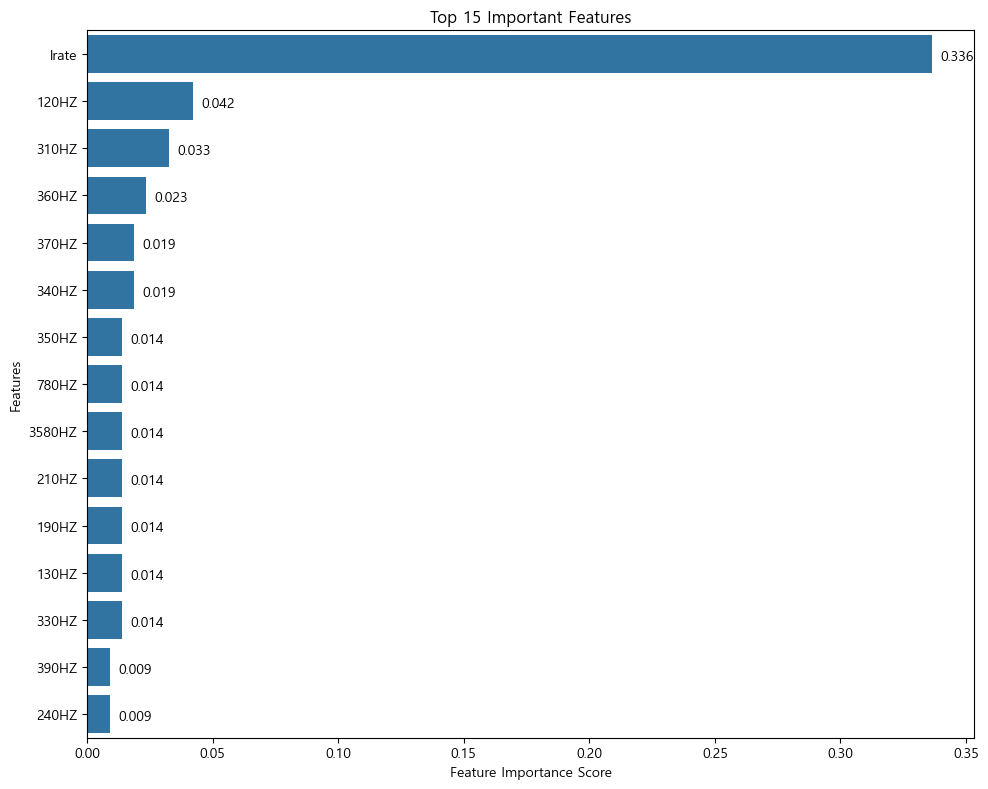

In [70]:
#AdaBoost기반에서의 Important Features
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 8))
feature=pd.Series(data=classifier.feature_importances_,index=X_test.columns)
feature=feature.sort_values(ascending=False)

top_15_features = feature[:15]

ax = sns.barplot(x=top_15_features, y=top_15_features.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Important Features')

# 각 막대 위에 값 표시
for i, v in enumerate(top_15_features):
    ax.text(v + 0.01, i + 0.05, f'{v:.3f}', ha='center', va='center')

plt.tight_layout()
plt.show()


In [51]:
num_epochs = 100
learning_rate = 0.001 
batch_size=64
input_size = 534
hidden_size = 2 
num_layers = 1 
num_classes = 5

classifier_DL = ['biLSTM', 'GRU']
for classifier_name in classifier_DL:
    s_time=time.time()
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective_DL(classifier_name, trial) ,n_trials=10)
    
    e_time=time.time()
    run_time=e_time-s_time
    print(f"{run_time:.2f}sec")
    
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)
    best_value = study.best_value
    print("Best Objective Value:",best_value)

    if classifier_name == 'biLSTM':
        best_model = biLSTM(num_classes, input_size, study.best_params['hidden_size'], num_layers, study.best_params['batch_size']).to(device)
        best_optimizer = torch.optim.Adam(best_model.parameters(), lr=study.best_params['learning_rate'])
        best_criterion = nn.CrossEntropyLoss()
        
        train_loader = DataLoader(train_dataset, batch_size=study.best_params['batch_size'], shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
        
        best.append(best_model)
        
    elif classifier_name == 'GRU':
        best_model = GRU(num_classes, input_size, study.best_params['hidden_size'], num_layers, study.best_params['batch_size']).to(device)
        best_optimizer = torch.optim.Adam(best_model.parameters(), lr=study.best_params['learning_rate'])
        best_criterion = nn.CrossEntropyLoss()
        
        train_loader = DataLoader(train_dataset, batch_size=study.best_params['batch_size'], shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
        
        best.append(best_model)

    for epoch in range(study.best_params['num_epochs']):
        s_time=time.time()
        train_loss, train_accuracy,all_train_labels,all_train_predictions = train_loop(train_loader, best_model, best_criterion, best_optimizer, device)
        test_loss, test_accuracy,all_labels,all_predictions = test_loop(test_loader, best_model, best_criterion, device)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{study.best_params['num_epochs']}")
            print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
            print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
            print("=" * 30)
            
    e_time=time.time()
    run_time=e_time-s_time
    print(f"{run_time:.2f}sec")
    print(f"Epoch {epoch + 1}/{study.best_params['num_epochs']}")
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
    print("=" * 30)
    print("train")
    train_dict,train_matrix=print_metrics(all_train_labels,all_train_predictions)
    print("=" * 30)
    print("test")
    test_dict,test_matrix=print_metrics(all_labels,all_predictions)
    
    train_df = pd.DataFrame(train_dict)
    test_df = pd.DataFrame(test_dict)
    
    train_conf_matrix.append(train_matrix)
    test_conf_matrix.append(test_matrix)
    
    all_train_dataframes.append(train_df)
    all_test_dataframes.append(test_df)

[I 2023-11-20 20:54:50,604] A new study created in memory with name: no-name-f2b4dafd-779a-456d-8573-669eddaf6a3c
[I 2023-11-20 21:03:32,222] Trial 0 finished with value: 0.0861432089410874 and parameters: {'batch_size': 126, 'hidden_size': 19, 'num_epochs': 402, 'learning_rate': 0.002851442119883009}. Best is trial 0 with value: 0.0861432089410874.
[I 2023-11-20 21:06:20,331] Trial 1 finished with value: 0.10271831786323171 and parameters: {'batch_size': 88, 'hidden_size': 33, 'num_epochs': 136, 'learning_rate': 0.001004682695152248}. Best is trial 0 with value: 0.0861432089410874.
[I 2023-11-20 21:12:05,264] Trial 2 finished with value: 0.08974237544989583 and parameters: {'batch_size': 122, 'hidden_size': 30, 'num_epochs': 272, 'learning_rate': 0.002532134017360893}. Best is trial 0 with value: 0.0861432089410874.
[I 2023-11-20 21:14:39,017] Trial 3 finished with value: 0.15116499336995648 and parameters: {'batch_size': 68, 'hidden_size': 107, 'num_epochs': 132, 'learning_rate': 0.0

2987.91sec
Best Hyperparameters: {'batch_size': 111, 'hidden_size': 121, 'num_epochs': 476, 'learning_rate': 0.0036160644825260356}
Best Objective Value: 0.06639515059670398
Epoch 50/476
Train Loss: 0.1219, Accuracy: 0.9554
Test Loss: 0.2843, Accuracy: 0.9119
Epoch 100/476
Train Loss: 0.0506, Accuracy: 0.9818
Test Loss: 0.2976, Accuracy: 0.9285
Epoch 150/476
Train Loss: 0.0258, Accuracy: 0.9917
Test Loss: 0.3896, Accuracy: 0.9246
Epoch 200/476
Train Loss: 0.0117, Accuracy: 0.9961
Test Loss: 0.3641, Accuracy: 0.9389
Epoch 250/476
Train Loss: 0.0170, Accuracy: 0.9945
Test Loss: 0.4076, Accuracy: 0.9360
Epoch 300/476
Train Loss: 0.0012, Accuracy: 0.9999
Test Loss: 0.4019, Accuracy: 0.9431
Epoch 350/476
Train Loss: 0.0154, Accuracy: 0.9952
Test Loss: 0.5069, Accuracy: 0.9268
Epoch 400/476
Train Loss: 0.0267, Accuracy: 0.9931
Test Loss: 0.6627, Accuracy: 0.9056
Epoch 450/476
Train Loss: 0.0003, Accuracy: 1.0000
Test Loss: 0.4249, Accuracy: 0.9453


[I 2023-11-20 21:51:35,984] A new study created in memory with name: no-name-55af5f8b-3156-418a-8bcf-ae0b22a87224


0.93sec
Epoch 476/476
Train Loss: 0.0023, Accuracy: 0.9994
Test Loss: 0.4458, Accuracy: 0.9405
train
Normalized Confusion Matrix(%):
 [[ 99.92   0.02   0.     0.01   0.05]
 [  0.03  99.85   0.     0.05   0.08]
 [  0.     0.   100.     0.     0.  ]
 [  0.04   0.02   0.    99.91   0.04]
 [  0.05   0.01   0.     0.01  99.92]]

Accuracy: 0.9993910854915969
Precision: 0.9993910836715029
Recall: 0.9993910854915969
F1 Score: 0.999391080991362
test
Normalized Confusion Matrix(%):
 [[89.92  2.25  0.    2.43  5.4 ]
 [ 4.16 86.76  0.    3.64  5.43]
 [ 0.02  0.   99.95  0.02  0.02]
 [ 2.21  2.25  0.   89.43  6.12]
 [ 2.44  1.22  0.    1.81 94.52]]

Accuracy: 0.9404716802424702
Precision: 0.9406547744428296
Recall: 0.9404716802424702
F1 Score: 0.9404336806384184


[I 2023-11-20 21:53:00,546] Trial 0 finished with value: 0.08117067626444407 and parameters: {'batch_size': 125, 'hidden_size': 116, 'num_epochs': 122, 'learning_rate': 0.001390283286521393}. Best is trial 0 with value: 0.08117067626444407.
[I 2023-11-20 21:56:49,917] Trial 1 finished with value: 0.08287554461072177 and parameters: {'batch_size': 117, 'hidden_size': 94, 'num_epochs': 323, 'learning_rate': 0.009659600509388706}. Best is trial 0 with value: 0.08117067626444407.
[I 2023-11-20 21:59:15,035] Trial 2 finished with value: 0.07629285849592726 and parameters: {'batch_size': 111, 'hidden_size': 113, 'num_epochs': 206, 'learning_rate': 0.005379665040790099}. Best is trial 2 with value: 0.07629285849592726.
[I 2023-11-20 22:04:22,937] Trial 3 finished with value: 0.26003978026141317 and parameters: {'batch_size': 96, 'hidden_size': 3, 'num_epochs': 412, 'learning_rate': 0.0005954564534203054}. Best is trial 2 with value: 0.07629285849592726.
[I 2023-11-20 22:08:52,636] Trial 4 fin

2143.25sec
Best Hyperparameters: {'batch_size': 89, 'hidden_size': 53, 'num_epochs': 483, 'learning_rate': 0.0020661430153178454}
Best Objective Value: 0.073072551619625
Epoch 50/483
Train Loss: 0.2086, Accuracy: 0.9213
Test Loss: 0.3604, Accuracy: 0.8849
Epoch 100/483
Train Loss: 0.1094, Accuracy: 0.9601
Test Loss: 0.3868, Accuracy: 0.9043
Epoch 150/483
Train Loss: 0.0662, Accuracy: 0.9763
Test Loss: 0.4423, Accuracy: 0.9102
Epoch 200/483
Train Loss: 0.0459, Accuracy: 0.9832
Test Loss: 0.5043, Accuracy: 0.9136
Epoch 250/483
Train Loss: 0.0406, Accuracy: 0.9860
Test Loss: 0.5833, Accuracy: 0.9147
Epoch 300/483
Train Loss: 0.0175, Accuracy: 0.9948
Test Loss: 0.6547, Accuracy: 0.9146
Epoch 350/483
Train Loss: 0.0148, Accuracy: 0.9955
Test Loss: 0.7641, Accuracy: 0.9027
Epoch 400/483
Train Loss: 0.0152, Accuracy: 0.9952
Test Loss: 0.7279, Accuracy: 0.9113
Epoch 450/483
Train Loss: 0.0137, Accuracy: 0.9954
Test Loss: 0.6934, Accuracy: 0.9185
1.03sec
Epoch 483/483
Train Loss: 0.0087, Accura

In [59]:
index_col=['LR',
 'KNN',
 'MNB',
 'AdaBoost',
 'biLSTM',
 'GRU']

In [65]:
final_train_df = pd.concat(all_train_dataframes, axis=0)
final_test_df = pd.concat(all_test_dataframes, axis=0)

In [67]:
a=pd.concat([final_train_df,final_test_df],axis=1)
a.index=index_col
a

,Accuracy,Precision,Recall,F1 Score,Accuracy,Precision,Recall,F1 Score
LR,0.697451,0.694620,0.697451,0.687554,0.676501,0.671094,0.676501,0.666060
KNN,1.000000,1.000000,1.000000,1.000000,0.936162,0.935958,0.936162,0.935987
MNB,0.544390,0.520066,0.544390,0.499361,0.546316,0.524327,0.546316,0.500974
AdaBoost,0.646830,0.639769,0.646830,0.622539,0.643683,0.637985,0.643683,0.620111
biLSTM,0.999391,0.999391,0.999391,0.999391,0.940472,0.940655,0.940472,0.940434
GRU,0.997463,0.997463,0.997463,0.997463,0.918593,0.919084,0.918593,0.918389


In [68]:
train_conf_matrix

[{'Normalized Confusion Matrix': [array([[ 50.94,   5.32,   0.  ,   4.53,  39.21],
          [ 18.23,  47.2 ,   0.  ,   6.21,  28.36],
          [  0.  ,   0.  , 100.  ,   0.  ,   0.  ],
          [ 20.91,   9.19,   0.  ,  26.06,  43.84],
          [ 17.26,   5.1 ,   0.  ,   3.84,  73.8 ]])]},
 {'Normalized Confusion Matrix': [array([[100.,   0.,   0.,   0.,   0.],
          [  0., 100.,   0.,   0.,   0.],
          [  0.,   0., 100.,   0.,   0.],
          [  0.,   0.,   0., 100.,   0.],
          [  0.,   0.,   0.,   0., 100.]])]},
 {'Normalized Confusion Matrix': [array([[18.88, 16.89, 16.68,  1.25, 46.31],
          [ 2.32, 41.6 , 29.86,  2.57, 23.65],
          [ 1.23,  0.32, 95.6 ,  0.  ,  2.85],
          [13.47, 24.88, 20.87,  5.3 , 35.49],
          [10.63, 16.32, 12.85,  1.82, 58.37]])]},
 {'Normalized Confusion Matrix': [array([[ 36.34,   6.76,   0.  ,   2.51,  54.4 ],
          [ 19.98,  37.02,   0.  ,   4.56,  38.44],
          [  0.  ,   0.  , 100.  ,   0.  ,   0.  ],
   

In [69]:
test_conf_matrix

[{'Normalized Confusion Matrix': [array([[ 48.18,   5.72,   0.  ,   5.4 ,  40.71],
          [ 20.06,  43.99,   0.  ,   7.28,  28.67],
          [  0.  ,   0.  , 100.  ,   0.  ,   0.  ],
          [ 19.78,   9.53,   0.  ,  23.23,  47.46],
          [ 19.33,   5.31,   0.  ,   4.44,  70.93]])]},
 {'Normalized Confusion Matrix': [array([[90.75,  2.14,  0.23,  2.32,  4.57],
          [ 4.91, 82.43,  0.06,  4.62,  7.98],
          [ 0.03,  0.02, 99.91,  0.02,  0.03],
          [ 3.29,  2.5 ,  0.21, 88.8 ,  5.2 ],
          [ 2.68,  1.34,  0.15,  1.9 , 93.93]])]},
 {'Normalized Confusion Matrix': [array([[19.51, 17.01, 17.01,  1.31, 45.16],
          [ 2.83, 41.68, 29.31,  3.01, 23.18],
          [ 0.99,  0.3 , 95.92,  0.  ,  2.79],
          [11.32, 26.23, 21.4 ,  5.58, 35.47],
          [10.73, 15.68, 13.56,  1.64, 58.38]])]},
 {'Normalized Confusion Matrix': [array([[ 36.03,   7.11,   0.  ,   2.48,  54.39],
          [ 19.13,  36.94,   0.  ,   5.03,  38.9 ],
          [  0.  ,   0.  , 100